<br><h1>  Version 2. <span style="color:red">감염률과 사망률이 높은 집단</span>에 대한 현황 및 원인 분석  </h1></br> 

안녕하세요.[Mulcamer] 팀입니다. 

저번 EDA를 바탕으로 3가지 주제의 새로운 인사이트를 가지고 왔습니다. 
저희 [Mulcamer] 팀은 [EDA 게시글 참조](https://dacon.io/competitions/official/235590/codeshare/1032?page=1&dtype=recent) Verison.1에서의 전반적인 EDA 분석을 바탕으로 데이터의 특징과 코로나에 대한 방향성을 잡고 분석을 진행하였습니다. 분석 방향은 코로나 바이러스를 예방하기 위해서는 현재 <span style="color:red">감염률이 높은 집단</span>과 <span style="color:red">사망률이 높은 집단</span>에 대한 현황 및 원인을 제대로 인지해야 한다고 생각하였습니다. 그리고 이에 따른 방안을 세우고 대처를 해야 코로나 바이러스로부터 1차적인 예방을 할 수 있다고 생각하였습니다. 그래서 이번에 가져온 인사이트는 감염률과 사망률이 높은 집단 유형에 대해 파악하는 주제를 가지고 이야기 해볼까 합니다. 목차는 다음과 같습니다.


### Topic 1. 20대 감염원인과 성향 파악

### Topic 2. COVID19는 과연 누구에게 치명적일까?

### Topic 3. 수도권과 다른 지역의 확진자 양상이 다른가?


**이번 포스팅이 유익하고 재밌으셨다면 투표 한번씩 부탁드립니다.**

**분석 과정에 대한 질문과 피드백은 언제든 환영입니다. 감사합니다:)**

---

## [이전 포스팅] 
### [Version_1 : Tableau & Plotly 활용 전반적 EDA 와 시각화](https://dacon.io/competitions/official/235590/codeshare/1032?page=1&dtype=recent)

---

### [Update]
(4월 22일) COVID-19 Plotly를 사용한 전반적 EDA

(4월 23일) 시간에 따른 세계 확진자 추이 TABLEU

(4월 24일) 시간에 따른 한국 확진자 추이 TABLEU

(4월 26일) EDA 결과 및 특징을 통한 분석 방향 확립

(4월 29일) Topic 1. 20대 감염 원인과 성향

(4월 29일) Topic 2. COVID19에 취약한 집단 분석

(5월 01일) Topic 3. 수도권과 다른 지역의 확진자 양상 분석

---

In [1]:
# essential libraries
import os
import math
import numpy as np
import pandas as pd
from datetime import datetime as dt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap 
import folium 
from PIL import Image

# API, URL, DB
from bs4 import BeautifulSoup
import requests
from urllib.parse import urlencode
from urllib.parse import quote_plus
from urllib.request import urlopen
import sqlite3

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

#pandas와 같이 plotly에서도 간단한 시각화 지원
import cufflinks as cf
cf.go_offline(connected=True)

# for offline ploting
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
print(px.colors.qualitative.Prism)

['rgb(95, 70, 144)', 'rgb(29, 105, 150)', 'rgb(56, 166, 165)', 'rgb(15, 133, 84)', 'rgb(115, 175, 72)', 'rgb(237, 173, 8)', 'rgb(225, 124, 5)', 'rgb(204, 80, 62)', 'rgb(148, 52, 110)', 'rgb(111, 64, 112)', 'rgb(102, 102, 102)']


In [3]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
DEFAULT_PLOTLY_COLORS=['#636EFA', '#EF553B', 
                       '#00CC96', '#AB63FA',
                       '#FFA15A', '#19D3F3',
                       '#FF6692', '#B6E880',
                       '#FF97FF', '#FECB52','rgb(57,105,172)']

DEFAULT_PLOTLY_COLORS2= ['rgb(95, 70, 144)', 'rgb(29, 105, 150)',
                         'rgb(56, 166, 165)', 'rgb(15, 133, 84)',
                         'rgb(115, 175, 72)', 'rgb(237, 173, 8)',
                         'rgb(225, 124, 5)', 'rgb(204, 80, 62)',
                         'rgb(148, 52, 110)', 'rgb(111, 64, 112)',
                         'rgb(102, 102, 102)']

layout_setting = {'xaxis_title':'Date',
                  'yaxis_title':'Number',
                  'font':dict(size=18,color='#60606e',
                              family='Franklin Gothic')}

layout_font = {'font':dict(size=18,color='#60606e',
                           family='Franklin Gothic' )}

In [4]:
path = '../covid'
os.chdir('./data')
file_name_list = os.listdir()

In [5]:
file_name_list

['202003Korea_Population.csv',
 '20200414.xlsx',
 '20200415.xlsx',
 '20200416.xlsx',
 '20200417.xlsx',
 '20200418.xlsx',
 '20200419.xlsx',
 '20200420.xlsx',
 '20200421.xlsx',
 '20200422.xlsx',
 '20200423.xlsx',
 '20200424.xlsx',
 '20200425.xlsx',
 '20200426.xlsx',
 '20200427.xlsx',
 '20200428ncovProvince.csv',
 '20200428_Gender.csv',
 'avgAgeProvince.jpg',
 'Case.csv',
 'COVID-19 Cases.csv',
 'floating_data_2019_03.db',
 'floating_data_2020.db',
 'floating_data_Total.db',
 'PatientInfo.csv',
 'PatientRoute.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [6]:
case = pd.read_csv("Case.csv")
#policy = pd.read_csv("Policy.csv")
region = pd.read_csv("Region.csv")
patientinfo = pd.read_csv("PatientInfo.csv")
region = pd.read_csv("Region.csv")
route = pd.read_csv( 'PatientRoute.csv')
timeProve = pd.read_csv("TimeProvince.csv")
timeAge = pd.read_csv("TimeAge.csv")
timeGender = pd.read_csv("TimeGender.csv")
seoulFloating = pd.read_csv('SeoulFloating.csv')
population = pd.read_csv("202003Korea_Population.csv", encoding='ANSI') # 2020.03 한국 인구수 from 통계청
numProvince = pd.read_csv("20200428ncovProvince.csv", index_col=False) # 2020.04.28 질병관리본부데이터
# http://ncov.mohw.go.kr/tcmBoardView.do?brdId=&brdGubun=&dataGubun=&ncvContSeq=354256&contSeq=354256&board_id=140&gubun=BDJ

# Topic 1. 20대 감염원인과 성향 파악

> 기존 EDA를 통해서 연령별 누적 확진자 추이와 사망자 추이를 보면 각 연령별 추이가 꾸준하게 지속되는 것을 확인했습니다. 20대는 꾸준하게 확진자 수가 높았으며 70~80대의 사망률 또한 계속해서 높은 상태를 유지했습니다. 그리하여, 연령대별 특징이나 행동특성이 코로나 감염과의 관계가 있을 것이라고 생각하여 `20대 감염자 어디서 왔는가?!`라는 주제로 분석을 진행해보았습니다.


## 결론 및 요약
코로나 종식 및 예방을 위해서는 가장 많은 감염자 수를 가진 20대 감염자의 수를 줄이는 것이 핵심과제라고 생각했습니다. 그래서 20대를 초점으로 분석을 진행하였고 다음과 같은 결과를 도출하였습니다.

### 1. 20대 감염자 어디서 왔는가?
확연히 들어나는 20대 확진자 수가 많은 원인을 찾아보았습니다. 처음 예상은 EDA를 바탕으로 '해외 유입인구'를 예상하였습니다. 하지만, 대다수가  <span style="color:red">신천지가 대다수</span>를 차지하는 것을 확인하였습니다.

### 2. 과연? 신천지와 해외유입 뿐인가?
신전치를 제외하고도 높은 20대 확진자의 비율을 확인하였습니다. 그 원인을 찾기위해 20대의 행동 특성을 방문경로와 유동인구 측면에서 확인해보았습니다. 그 결과  <span style="color:red">20대는 코로나 바이러스에 대한 위험의식이 낮은 경향이 있으며, 불필요한 방문지역(PC방 등)에 더 많이 방문</span>하는 등 활동 반경이 넓은 특성을 파악했습니다.

### 3. 해결방안
따라서, 가장 우선적으로 신천지와 같은 집단 감염을 막는 것을 막기위해 사회적 거리두기를 적극 실천하고 불필요 방문지역을 줄이도록 해야합니다. 또한, 20대가 많이 방문하는 업종은 사전에 방역 작업과 개인 위생관리를 철저하게 준수하도록하여 확산을 사전에 방지해야합니다. 더 나아가, 20대 스스로 '나는 괜찮다, 젊어서 괜찮다'는 방식의 사고방식을 버리고 코로나에 대한 경각심을 가지고 외출을 자제해야합니다.

---

이런 결론 내용은 이번에 넣기 애매해서 제외


#### 실제 해외에서 유입되는 코로나 확진자는 눈에 뛰게 높지 않았습니다. 오히려 해외의 경우 이제 막 급격히 확생되는 시점임을 고려했을 때, 해외 입국자가 감염되있을 확률이 높은 것은 사실입니다. 따라서 해외에서 입국하는 내국인 인원들에 대해서 <span style="color:red">감염자 검사, 색출 및 관리</span> 에 집중하여 국내 확산으로 넘어가지 않도록 철처히 차단해야합니다.  
#### 실질적으로 가장 큰 코로나 확산의 원인은 집단 감염인 것으로 밝혀졌습니다. 집단 발생 관련이 약 80%를 차지하고 그 중 약 48%는 신천지 관련으로 발생된 확산이었습니다.[[1]](https://www.cdc.go.kr/board/board.es?mid=a20501000000&bid=0015) 따라서, 국내 코로나 확산 방지를 위해서는 <span style="color:red">많은 인원이 모이는 단체 활동을 피하고 사회적 거리두기를 적극 실천</span>해야합니다. 특히나  코로나 위험성에 대한 경각심이 낮은 <span style="color:red">20대에 대한 집중 관리</span>가 필요하며, 다수의 인원이 모이는 장소는 적극적인 방역 활동과 개인 위생 수칙 준수를 철저히 강조하여 코로나 종식을 향해 전국민이 함께 노력해야합니다.

# 1. 20대 감염자 어디서 왔는가?!

In [7]:
# population.csv 데이터 전처리 과정
cols = list(population.columns)
cols = list(map(lambda x : x[9:] if len(x) > 9 else x, cols))
population.columns = cols
pops = population.iloc[0,3:12]
for i, pop in enumerate(pops.values):
    pops[i] = int(pop.replace(',',""))

# 최신일자 누적 확진자 데이터
recentDay = timeAge['date'].iloc[-1]
recentConfirmed = timeAge[timeAge['date'] == recentDay]['confirmed']
confirmedRatio = np.array(recentConfirmed)*100 / np.array(pops)
C_Ratio_df = pd.Series(confirmedRatio)
C_Ratio_df.index = timeAge['age'].unique()
pops.index = C_Ratio_df.index

In [8]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.15, vertical_spacing=0.05,
                   subplot_titles=['<b>연령별 인구수</b>', '<b>누적확진자 비율</b>'])

fig.add_trace(go.Bar(x=pops.index,y=pops.values,
                     marker=dict(color=DEFAULT_PLOTLY_COLORS[1:])), row=1,col=1)

fig.add_trace(go.Bar(x=C_Ratio_df.index,y=C_Ratio_df.values,
                     marker=dict(color=DEFAULT_PLOTLY_COLORS[1:])), row=1, col=2)

fig.update_layout(title='<b>연령별 누적 확진자</b>', **layout_font, showlegend=False)

fig.update_xaxes(title_text='<b>연령 그룹</b>')
fig.update_yaxes(title_text='<b>인구수</b>', row=1, col=1)
fig.update_yaxes(title_text='<b>확진자 수 / 그룹 인구(%)</b>', row=1, col=2)

fig.show()

20대의 인구수에 비해서 40~50대의 인구수가 약 28%만명 더많은 것을 알 수 있습니다. 그럼에도 20대의 확진자 수가 훨씬 많은 것을 알 수 있습니다. 또한, 연령별 인구수에 대한 확진자의 비율을 보면 20대의 확진자 비율이 더욱 극명하게 나타나는 것을 확인할 수 있습니다. 20대의 코로나 확진자가 많은 것의 이유를 알아보겠습니다.

## 1-1) 20대 감염경로 파악, 해외 유입인구
가장 많은 확진자 수를 가진 20대들은 과연 어느 경로를 통해서 유입되는지 확인해보았습니다. 우선 patientinfo 데이터를 사용해서 감염된 경로 및 케이스를 분석해보았습니다. 그 중에서 목표로하는 20대의 확진 케이스가 어떠한지 확인하였습니다. <span style="color:red">해외유입인구</span>가 가장 큰 원인인 것을 확인했습니다.

In [9]:
# 이름 앞부분으로 단축
patientinfo['infection_case'] = patientinfo['infection_case'].astype(str).apply(lambda x : x.split()[0])
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',
                                        values='patient_id', aggfunc='count')
# 전체 감염 케이스
patientTotal = infectionCase.fillna(0).sum(axis=1)
patientTotal = patientTotal.sort_values(ascending=False)[:5]
# 20대 감염 케이스
patient20s = infectionCase['20s'].dropna()
patient20sTop = patient20s.sort_values(ascending=False)[:5]

In [10]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['<b>전체 연령</b>', '<b>20 대</b>'])

fig.add_trace(go.Pie(values=patientTotal.values, labels=patientTotal.index, 
                    name='<b>전연령</b>'),row=1,col=1)
fig.add_trace(go.Pie(values=patient20sTop.values, labels=patient20sTop.index, 
                    name='<b>20s</b>'),row=1,col=2,)

fig.update_traces(textinfo="percent+label")
fig.update_layout(title='<b>확진자 감염 케이스</b>', **layout_font, showlegend=True,
                 height=600)
fig.show()

해외에서 유입된 20대 감염자들이 가장 많은 것을 보여주고있습니다. 전체 감염자 비율과는 조금 다르게 해외에서 유입되는 20대의 비율이 상당히 높은 것을 알 수 있습니다. 따라서, 20대의 경우 해외 유입을 통해서 들어온 확진자가 많다고 생각할 수 있습니다. 하지만 환자 정보 데이터의 결측치와 기타 부분이 많아 분석의 한계점과 데이터에 대한 신뢰에 의문을 가졌고 중앙방역대책 본부의 데이터를 통해 다시 분석을 진행하였습니다.

## 1-2) 20대 감염경로 파악, 핵심은 신천지

patientInfo의 부족한 데이터를 보충하기 위해서 중앙방역대책본부의 데이터와 대구광역시 재난안전 대책본부의 발표를 활용하였습니다. 전체 코로나 확진자 중 48.5%가 대구 신천지와 관련된 확진자인 것으로 조사되었으며, 신천지 신도들 중 20대의 비율이 매우 높은 것을 확인하였습니다.

In [11]:
numProvince.index = numProvince['City']
cases = ['Overseas', 'Shincheonji', 'Collective','Patient_contact',
         'Oversea_inflow_related', 'ETC']
confiredSum = numProvince[cases].sum()
confiredSum_df = pd.DataFrame(confiredSum, columns=['num']).reset_index()

In [12]:
fig=px.pie(confiredSum_df, values='num', names='index',
           color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_traces(textinfo="percent+label")
fig.update_layout(title='<b>확진자 감염 케이스 비율</b>', **layout_font, showlegend=True)
fig.show()

[중앙방역대책본부의 4월28일 현황 발표 데이터](https://www.cdc.go.kr/board/board.es?mid=a20501000000&bid=0015)에 의하면 전체 코로나 확진자 중 48.5%가 대구 신천지와 관련된 확진자인 것으로 조사되었습니다. 

[대구광역시 재난안전대책본부의 3월 6일 발표](https://blog.naver.com/daegu_news/221840129905)에 의하면 신천지 교인 10,914명 중 90% 이상이 진단검사를 받은 것으로 파악되고 이 중 3,617명이 확진판정을 받았습니다. 신천지 교인 3,617명 중 남성이 1,170명(32.3%), 여성은 2,447명(67.7%)로 여성이 2배 이상 많으며, <span style="color:red">20대 1,376명(38.0%)</span>, 50대 663명(18.3%), 40대 496명(13.7%) 순으로, 20대와 40~50대 비율이 높은 것으로 확인되었습니다. 

즉, <span style="color:red">상당수의 20대 확진자가 신천지 교회에서 발생된 것</span>을 확인할 수 있었습니다. 그리하여 대부분의 20대 감염 원인은 신천지에서 유입된 것으로 판단할 수 있었습니다.

# 2. 20대 높은 감염자수 오직 신천지 때문인가?

[3월 23일 중앙방역대책본부장의 정례 브리핑 내용](https://www.youtube.com/watch?v=6BnKcnACgnk)에 의하면 신천지 교인 중 20대가 많은 점도 있지만 <span style="color:red">신천지 교인을 제외하더라도 20대가 많다</span>고 발표하였습니다. 그리하여 여전히 20대 확진자가 왜 많은지에 대한 궁금증은 이어졌고 이를 파악하기위해 유동인구와 방문지역을 중심으로 분석을 진행하였습니다.

## 2-1) 20대의 유동인구 파악 
가장 먼저 생각해볼 수 있는 것이 유동인구라고 생각했습니다. [SKT 빅데이터 허브](https://www.bigdatahub.co.kr/index.do)에서 제공하는 기지국 신호정보를 기반으로 서울시 유동인구를 활용하였습니다. API 연동 부분의 코드는 AccessKey 공개여부 때문에 생략했고, 저장된 DB에서 불러오는 부분만 첨부하였습니다.

코로나 전과 후의 유동인구를 파악하기위해서 공개된 데이터 최초인 2019년 3월에서 시작해서 가장 최근 데이터인 2020년 2월까지의 데이터를 활용했습니다.

In [13]:
# 2019년 3월 ~ 2019년 5월까지 유동인구 
# SKT 빅데이터 허브 API 데이터 
base_url = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json"

DB = pd.DataFrame()
for mon in [1002254,1002255,1002256]: # 3,4,5 월
    for i in range(1,3001):
        params = urlencode({'TDCAccessKey' : 'ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9',
                 'pid' : mon, 
                 '$page' : i, '$count' : 3000,
                 '$select' : '*',
                 '$where' : '시간(1시간단위) = 18'})
        data = requests.get(url=base_url, params=params).json()
        if data['entry'] == [] : break
        db = pd.DataFrame(data['entry'])
        DB = pd.concat([DB, db])
        
DB.columns = seoulFloating.columns
DB['fp_num'] = DB['fp_num'].astype(int)

In [14]:
sql = sqlite3.connect(r"floating_data_2019_03.db")
floating_02 = pd.read_sql("SELECT * FROM moving1903", sql)
floating_02 = floating_02.drop(['index'], axis=1, errors='ignore')

fp_age = pd.pivot_table(floating_02, index='date',columns='birth_year',values='fp_num')
fp_age.index = list(map(lambda x : x[:4] + '-' + x[4:6] + '-' + x[6:], fp_age.index))
fig = go.Figure()
for col in fp_age.columns:
    fig.add_trace(go.Scatter(x=fp_age.index, y=fp_age[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>2019년 3~5월 유동인구</b>', **layout_setting)
fig.show()

20대의 유동인구가 많을 것이라고 예상했던 것과는 다르게 <span style="color:red">30~40대의 유동인구가 가장 많았습니다.</span> 그 다음으로 20대와 50대가 유동인구 측면에서 유사한 것을 확인할 수 있었습니다. 

전반적으로 평일은 회사나 학원 등 일상생활을 진행하기에 유동인구가 주말에 비해 높으면서 일정하게 유지되는 것을 확인할 수 있습니다. 이후, 주말은 토요일과 일요일 순서로 점차 유동인구가 감소하는 것을 확인할 수 있습니다.

20대 행동 패턴으로 확인할 수 있는 약간의 특징으로는 우리나라의 `불금` 성향을 따라 금요일 20대의 유동인구가 늘어나는 것을 확인할 수 있습니다. 또한, 다른 연령대에 비해서 상대적으로 토요일 유동인구가 많은 것 또한 확인할 수 있습니다.

In [15]:
# base_url = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json"

# DB_2020 = pd.DataFrame()
# for mon in [1002286,1002291]: # 1월 api pid, 2월 api pid
#     for i in range(1,3001):
#         params = urlencode({'TDCAccessKey' : 'ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9',
#                  'pid' : mon, 
#                  '$page' : i, '$count' : 3000,
#                  '$select' : '*',
#                  '$where' : '시간(1시간단위) = 18'})
#         data = requests.get(url=base_url, params=params).json()
#         if data['entry'] == [] : break
#         db = pd.DataFrame(data['entry'])
#         DB_2020 = pd.concat([DB_2020, db])
        
# DB_2020.columns = seoulFloating.columns
# DB_2020['fp_num'] = DB_2020['fp_num'].astype(int

# sql = sqlite3.connect(r"floating_data_2020.db")
# DB_2020.to_sql('moving',sql, if_exists='replace')

In [16]:
sql = sqlite3.connect(r"floating_data_2020.db")
floating = pd.read_sql("SELECT * FROM moving", sql)
floating = floating.drop(['index'], axis=1, errors='ignore')

fp_age = pd.pivot_table(floating, index='date',columns='birth_year',values='fp_num')
fp_age.loc['20200223'] = fp_age.loc['20200223']/2 # 이상치 처리
fp_age.index = list(map(lambda x : x[:4] + '-' + x[4:6] + '-' + x[6:], fp_age.index))
fig = go.Figure()
for col in fp_age.columns:
    fig.add_trace(go.Scatter(x=fp_age.index, y=fp_age[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>2020년 1~2월 유동인구</b>', **layout_setting)
fig.show()

3월 데이터가 아직 공개되지 않은 관계로 2020년 1월~2월 까지의 데이터를 API를 통해 가져왔습니다. 1월 25일 근처로 깊은 유동인구의 하락은 설날로 인한 지방으로 전체적인 인구가 이동하면서 발생된 감소이므로 분석에서 제외하고 그래프를 보시면 되겠습니다. 

설날 이후 중국에서 넘어온 코로나에 대한 경각심이 시작된 시점입니다. 1월 31일을 기점으로 60, 70대의 유동인구가 급격하게 감소하였으며, 그 추세를 이어가고 있습니다. 또한, 오히려 20대의 전반적인 유동인구의 수가 50대와 더 차이가 나는 것을 볼 수 있었습니다. 

5천만 인구인 대한민국에서 서울시의 유동인구를 대표하기에 부족한점, 동일 기간의 데이터가 아닌점, 대학과 학교가 개학하지 않고 온라인 수업을 진행한 것, 코로나에 민감해진 3월~4월의 유동인구 데이터가 없는 점 등의 한계가 많았습니다. 

결론적으로 <span style="color:red">유동인구를 통한 20대의 코로나 확진자 관계는 발견되지 않았습니다.</span> 하지만, 한국의 정책에서 1월 28일 Level 3 질병 경보 이후의 고연령층의 유동인구 변화, 금요일과 주말의 유동인구의 변화, 3월 이후의 유동인구의 변화 등 더 유의미한 의미를 찾아낼 수 있을 것으로 예상되었습니다. 이후 다음 추가적인 연구 및 분석을 진행해볼 예정입니다.

## 2-2) 20대 확진자들의 이동경로 파악

유동인구 측면에서 20대의 움직임이 많지 않았습니다. 하지만 금요일 저녁부터 토요일까지의 유동인구가 다른 연령대에 비해 훨씬 많은 것을 파악했습니다. 사회활동이 활발한 20대의 특징을 확연히 볼 수 있었습니다. 이를 바탕으로 실제 확진자들을 기준으로 20대가 어떻게 움직였는지를 확인하기 위한 분석을 진행했습니다. 환자의 이동경로를 나타낸 Route 데이터셋과 환자 정보가 전반적으로 나타나있는 PatientInfo 데이터를 환자의 아이디 번호를 기준으로 합병한 데이터를 활용하였습니다. 전체 확진자들 보다는 20대와 가장 유사한 유동인구 수를 보여주었던 50대와의 비교를 통해 분석을 진행했습니다.

In [17]:
patientinfo['infection_case'] = patientinfo['infection_case'].astype(str).apply(lambda x : x.split()[0])
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',values='patient_id', aggfunc='count')
mergeTemp = pd.merge(route, patientinfo,on='patient_id')
pinfoANDroute = mergeTemp.pivot_table(index='type', columns=['age'], values='patient_id', aggfunc='count')
pinfoANDroute.index = list(map(lambda x : x.split('_')[0], pinfoANDroute.index))
target = ["20s", "50s"]

In [18]:
# fig = make_subplots(3,2, horizontal_spacing=0.03,
#                    vertical_spacing=0.1)

# for i, column in enumerate(['10s', '20s', '30s', '40s', '50s', '60s']):
#     row, col = i//2 + 1, i%2 + 1
#     ageInfectionCase = infectionCase[column].dropna()
#     fig.add_trace(go.Bar(x=ageInfectionCase.index, y=ageInfectionCase.values,
#                          name=column),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염 Case</b>",
#                   height=1000, **layout_font)    
# fig.show()

In [19]:
# pinfoANDroute = pd.merge(route, patientinfo,on='patient_id').pivot_table(index='type', columns=['age'], values='patient_id', aggfunc='count')
# pinfoANDroute.index = list(map(lambda x : x.split('_')[0], pinfoANDroute.index))
# target = ["20s","30s","40s","50s"]

# fig = make_subplots(2,2, horizontal_spacing=0.1,
#                    vertical_spacing=0.1, subplot_titles=[f"{x}" for x in target])

# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute[column].dropna()
#     fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
#                          name=column, orientation='h'),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=20, r=20, t=100, b=20),
#                   height=1000, width=1000, **layout_font)    
# fig.show()

In [20]:
# fig = make_subplots(1,2, horizontal_spacing=0.1,
#                    vertical_spacing=0.1, subplot_titles=[f"{x}" for x in target])

# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute[column]
#     fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
#                          name=column, orientation='h'),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=20, r=20, t=100, b=20),
#                   height=600, width=1000, **layout_font)    
# fig.show()

In [21]:
target = ["20s", "50s"]
target_index = np.setdiff1d(pinfoANDroute.index, [])

fig = make_subplots(1,2, horizontal_spacing=0.15, subplot_titles=[f"{x}" for x in target])
ylabel = None
for i, column in enumerate(target):
    row, col = i//2 + 1, i%2 + 1
    routeTemp = pinfoANDroute.loc[target_index,column]
    infectionRoute = routeTemp.fillna(0).sort_values()
    fig.add_trace(go.Bar(x=infectionRoute.values[-10:], y=infectionRoute.index[-10:],
                         name=column, orientation='h'),row=row, col=col)
    
fig.update_layout(title="<b>연령별 감염자 상위 10개 방문지역  </b>",
                  margin=dict(l=20, r=20, t=100, b=20),
                  height=500, width=1000, **layout_font)    

fig.update_xaxes(title_text="<b>방문 회수</b>")
fig.update_yaxes(title_text="<b>방문 경로</b>", row=1, col=1)

fig.show()

환자들의 이동경로가 결국 마지막은 병원으로 이동해서 확진을 받는 것과, etc 분류는 파악이 불가능하고 두 집단 모두 동일하게 가장 높은 비율을 가지고 있다는 점을 고려하여 두 경로를 제외한 이동경로에 대해서 비교를 해보았습니다. 추가적으로 생활하는 과정에 방문을 피할 수 있는 지역을 기준으로 구분하였습니다.

불필요 방문 업종 : 부동산, 미용, 제과점, 헬스장, 바, 숙박업소, pc방, 카페, 교회, 가게, 레스토랑

필요 방문 업종 : 관공서, 은행, 학업관련, 약국, 대중교통 등 

In [22]:
# fig = make_subplots(rows=1, cols=2, 
#                     horizontal_spacing=0.1,
#                     vertical_spacing=0.1, 
#                     specs=[[{"type": "pie"}, {"type": "pie"}]],
#                     subplot_titles=[f"{x}" for x in target])
# target_index = np.setdiff1d(pinfoANDroute.index, ['hospital','etc','store',
#                                                  'public','restaurant',
#                                                  'church','pharmacy'])

# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute.loc[target_index,column]
#     fig.add_trace(go.Pie(labels=infectionRoute.index, 
#                          values=infectionRoute.values, 
#                          name=column),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=30, r=20, t=100, b=20),
#                   height=600, width=1000, **layout_font)    
# fig.show()

In [23]:
# not_necessary = ['bar', 'beauty', 'cafe','church',
#                 'gym','lodging','pc','school','store','academy']

# fig = make_subplots(1,2, 
#                     horizontal_spacing=0.1,
#                     vertical_spacing=0.1, 
#                     specs=[[{"type": "pie"}, {"type": "pie"}]],
#                     subplot_titles=[f"{x}" for x in target])


# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute.loc[not_necessary,column]
#     fig.add_trace(go.Pie(labels=infectionRoute.index, 
#                          values=infectionRoute.values, 
#                          name=column),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=30, r=20, t=100, b=20),
#                   height=600, width=1000, **layout_font)    
# fig.show()

In [99]:
pinfoANDroute.drop(['hospital','etc'], inplace=True, errors='ignore')

not_necessary = ['real', 'beauty', 'bakery', 'gym', 'bar', 'lodging',
                 'pc', 'cafe', 'church', 'store', 'restaurant']

fig = make_subplots(1,2, horizontal_spacing=0.15, subplot_titles=[f"{x}" for x in target])

for i, column in enumerate(target):
    row, col = i//2 + 1, i%2 + 1
    infectionRoute = pinfoANDroute.loc[:,column].fillna(0)
    infectionRoute = infectionRoute / sum(infectionRoute)
    infectionRoute = infectionRoute[not_necessary]
#     infectionRoute = infectionRoute
    fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
                         name=column, orientation='h'),row=row, col=col)
    
fig.update_layout(title="<b>20대와 50대의 불필요 방문지역</b>",
                  margin=dict(l=20, r=20, t=100, b=20),
                  height=600, width=1000, **layout_font)    

fig.update_xaxes(title_text="<b>방문 비율</b>")
fig.update_yaxes(title_text="<b>방문 지역</b>", row=1, col=1)

fig.show()

필수 방문지가 아닌 곳, `not necessary`에 방문한 비율을 구하여 비교하였습니다. 위 그래프를 보면 공통적으로 많이 방문하는 store과 church는 비슷한 양상을 보여주고 있습니다. 하지만, 20대는 음식점, pc방, cafe, bar 등에서 훨씬 많은 방문비율을 확인할 수 있었습니다. 이를 통해서 불필요 지역 방문이 높은 <span style="color:red">20대는 활동 반경이 넓고 활발한 것을 고려하여 코로나에 더 쉽게 노출될 수 있을 것이라 판단</span>하였습니다.

### 외부 자료 및 보도

위의 결과 외에도, 서울대학교 보건대학원 유명순 교수팀이 지난달 25~27일간 한국리서치에 의뢰해 진행한 [‘코로나19국민 인식조사’를 분석결과](https://news.joins.com/article/23751923)에 따르면, <span style="color:red">20대의 코로나 바이러스에 대한 인식이 매우 낮다는 결과</span>가 나왔습니다. 

그 뿐만 아니라, [4월 27일 질병관리본부에서 발표한 보도자료](https://www.cdc.go.kr/board/board.es?mid=a20501000000&bid=0015&list_no=367014&act=view)에 따르면 대구 확진자가 부산 클럽, 주점 및 숙박업소 등에 방문하며 143명의 접촉자가 발생했습니다.  

또한, 강남과 홍대 클럽이 개장하며 길게 줄서있는 모습, [자가격리 중 매일 스타벅스 간 20대 서초구 36번 확진자](https://www.nocutnews.co.kr/news/5325329) 등을 보았을 때, 20대들의 코로나에 대한 경각심과 인식이 부족한 경향이있습니다.

### 결론 및 요약
20대 확진자의 비율은 신천지 집단 감염 발생으로 인한 것입니다. 하지만, 신천지 외의 20대 확진자의 비율은 여전히 타 연령대에 비해 높습니다. 그 이유는 20대의 코로나에 대한 경각심 부족으로 불필요 방문지역에 다수 방문하는 것을 원인으로 판단하였습니다. 
따라서, 코로나 확산 방지 및 종식을 위해서는 사회적 활동 반경이 넓고 움직임이 많은 20대의 적극적인 사회적 거리두기와 외출 및 불필요 지역 방문 횟수를 자제해야합니다.

코로나 확산 방지 및 종식을 위해서는 가장 우선적으로 신천지와 같은 집단 감염을 막는 것을 막아야합니다. 그러므로 사회적 거리두기를 적극 실천하고 불필요 방문지역을 줄이도록 해야합니다. 또한, 20대가 많이 방문하는 업종은 사전에 방역 작업과 개인 위생관리를 철저하게 준수하도록하여 확산을 사전에 방지해야합니다. 더 나아가, 20대 스스로 '나는 괜찮다, 젊어서 괜찮다'는 방식의 사고방식을 버리고 코로나에 대한 경각심을 가지고 외출을 자제해야합니다.

---

# Topic 2. 과연, COVID19는 누구에게 치명적일까?

> 두번째 분석작업은 코로나 질병이 완치되기 까지의 기간이 연령대별로 차이가 있을지에 대한 의문이 들었으며, 실제로 젊을수록 회복기간이 빠른가에 대한 궁금증으로 분석작업을 시작하였습니다. 또한 전반적인 연령대별 확진 환자와 사망자의 비율을 알아보고, 세부적으로 격리중인 환자, 격리해제된 환자, 사망자를 탐색하며 확진자 및 사망자를 줄일 수 있는 방안을 도출하고자 하는 목적으로 진행하였습니다.

# 결론 및 요약
 
 COVID19 바이러스는 60대이상의 고연령층, 폐 질환 뿐만 아니라 기저질환을 앓고 있는 환자 이렇게 두 환자 유형에게 매우 치명적인 바이러스 입니다.

### 1. 나이가 많을 수록 완치 기간이 오래 걸린다? 

 COVID19를 회복하기 까지의 기간은 평균 21일, 약 3주로 회복하기까지의 기간이 깁니다. 특히 <span style="color:red">고연령층은 평균 이상의 완치기간을 소요하는 비율이 70%가넘습니다.</span> 코로나는 폐를 섬유화시키고, 섬유화된 폐가 다시 회복될 수 없습니다. 그러므로 다른 연령대에 비해 완치기간이 길다는 것은 매우 치명적입니다. 고연령층은 외출을 자제하며 스스로 예방할 필요성이 있다는 결론을 지을 수 있었습니다.
 
 반대로 20대는 빠른 회복기간을 가진다는 것은 면역력이 높다는 것으로 예상할 수 있습니다. 또한, 20대의 경우 기존의 병력이 있는 경우가 드물고, 코로나가 합병증과 함께 사망으로 까지 이어질 확률이 낮을 것입니다. 
 
### 2. 사망자의 원인은 질병이다?

 사망자 정보에서 약 30%는 기저질환을 앓고 있었던 것을 통해, 기저질환을 앓을 경우 사망률이 높다라는것을 알 수 있었습니다. 

 또한, '서울 의과대 COVID-19 임상 논문'에 의하면 "COVID19는 폐 질환을 가진 환자에게만 나타나는 것이 아니라 총 5,466명의 환자 분석을 한 결과 기저질환 환자 중 고혈압환자(22%), 당뇨(14%), 심장 질환(11%), 호흡계 질환(10%)을 가진 환자들이다." 라는 연구 결과를 보아 기저질환이 실제 COVID19에 영향을 미치며 폐 질환 뿐만아니라 다른 기저질환도 영향을 끼친다는 점을 알 수 있었습니다.

In [25]:
fig = px.bar(timeAge, x='date', y='confirmed',
             hover_data=['age'], color='age', )

fig.update_layout(title='<b>연령별 누적 확진자 추이</b>', **layout_setting, )
fig.show()

In [26]:
timeAge_Date = timeAge.pivot_table(index = ['date'],columns=['age'], aggfunc=sum)
timeAge_Date['deceased']

fig = go.Figure()
for col in timeAge_Date['deceased'].columns:
    fig.add_trace(go.Scatter(x=timeAge_Date.index,y= timeAge_Date['deceased'][col],
                 mode='lines+markers', name=col))
fig.update_layout(title='<b>연령별 누적 사망자 추이</b>', **layout_setting)
fig.show()

우선, 연령별로 확진 환자와 사망 환자가 얼마나 분포 현황에 알아보기 위한 EDA를 진행했고 아래와 같은 연령별 확진자와 사망자 추이 결과를 알 수 있었습니다.

> 연령별 누적 확진자 추이
- 20대, 50대가 가장 높은 확진자 비율을 차지 하고 있었습니다.
- 20대, 50대, 40대, 60대, 30대, 70대, 10대, 80대, 0대 순으로 높은 확진자 비율을 가지고 있습니다. 
- 20대는 확진 환자 수가 많지만, 사망 환자는 없습니다.
- 반대로, 80대는 확진 환자 수는 적지만 사망 환자 수가 가장 많습니다.

> 연령별 누적 사망자 추이
- 나이때가 높은 순으로 사망자 수가 많습니다.
- 70대,80대의 사망자 추이는 꾸준히 증가하는것을 볼 수 있습니다.


 그 다음은 환자 정보를 통해 연령대 별로 격리 중인 환자, 격리 해제된 환자 그리고 사망 환자에 대한 비교를 위한 작업을 하였습니다. 
 
 ### 다음 연령별 환자 정보는 2020.01.23 - 2020.04.14 사이에 기록된 환자들의 정보입니다.

In [27]:
patientinfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [28]:
state_age=patientinfo.groupby('state')['age'].value_counts()
stage_age=pd.DataFrame(state_age)

In [29]:
state_age=state_age.copy()

In [30]:
stage_age.rename(index={'0s':'0대','10s':'10대','20s':'20대','30s':'30대','40s':'40대','50s':'50대','60s':'60대','70s':'70대','80s':'80대','90s':'90대','100s':'100대'},inplace=True)

stage_age=stage_age.T
stage_age=stage_age.drop(('isolated','100대'), axis=1, inplace=False) #격리된 연령층 100살대 1개 제외
stage_age=stage_age.T

stage_age.columns=['count']
released_=stage_age.loc['released',:].sort_index()
isolated=stage_age.loc['isolated',:].sort_index()
deceased=stage_age.loc['deceased',:].sort_index()
deceased_t=pd.DataFrame(data=(0,0,0), index=['0대','10대','20대'])
deceased_t.columns=['count']
deceased=pd.concat([deceased_t, deceased], axis=0)

In [31]:
layout_setting = {'xaxis_title':'연령별','yaxis_title':'환자 수','font':dict(size=18,color='#60606e',family='Franklin Gothic' )}

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(x=released_.index, y=released_['count'],
                    name='격리해제 환자'), secondary_y = False)
fig.add_trace(go.Bar(x=isolated.index, y=isolated['count'],
                    name='격리 환자'), secondary_y = False)
fig.add_trace(go.Scatter(x=deceased.index, y=deceased['count'], 
                    mode='lines+markers', name='사망 환자', line=dict(
                color="Green",
                width=2,
            )), secondary_y=True)

fig.update_layout(title='<b>연령별 환자 상태 (격리해제 환자/ 격리 환자 / 사망 환자)<b>', **layout_setting, xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False))

fig.show()

### 결과 요약
역시 확진환자 수는 20대에 가장 두드러지게 볼 수 있었으며, 사망자수는 80대에 가장 많았음을 알 수 있었습니다.
가장 주목해서 볼 수 있었던 점은 60대부터 90대는 격리해제 환자보다 아직 격리중인 환자수가 더 많다는 사실을 볼 수 있었습니다.

반대로 0대부대 50대는 격리해제 환자가 격리 환자보다 많았습니다. 이는 60대부터는 완치가 잘 되지 않고 격리 해제가 되기까지의 기간이 길기 때문에 격리 환자 수가 격리 해제 환자보다 많다라고 예상해 볼 수 있었습니다.

# 1.  나이가 많을 수록 완치기간이 더 오래걸린다?

 COVID19가 연령대 별로 얼마나 오랜 기간동안 완치가 되고 있지 않은지에 대해 알아보고자 하였습니다. 더불어, 사망률이 COVID19의 완치기간과의 연관성이 있는가에 대한 의문점이 들었습니다. 만약 있다면 젊을 수록 회복기간이 빨라 사망률이 적은것인가에 대한 궁금증으로 분석작업을 하였습니다. 완치기간은 '확진날짜(Confirmed date)'와 '격리 해제(Released date)'의 차이를 구해 진행하였습니다. 

 PatientInfo data에서 격리해제일(released_date)와 확진판정일(confirmed_date)의 차이를 구해서 실제 나이가 많을 수록 면역력이 부족하기 때문에 격리 해제까지 기간이 오래 걸리는가에 대해 알아보았습니다. 우선 격리해제자인데 격리해제된일이 NaN인 사람, 즉 Null값을 가지고 있는 304명의 데이터는 제외하고 분석작업을 진행하였으며, 두 날짜에 대한 차이는 datetime으로 변환 후 구해주었습니다.
그리고 치유기간의 평균을 구해 연령대별 평균 이상, 이하의 분포를 알아보았습니다.

In [32]:
released_p=patientinfo[patientinfo['state']=='released'] #격리해제자인데 격리해제된날 NaN인 사람 : 304명 제외 
released_p=released_p.dropna(subset=['released_date','age'], inplace=False)

released_p['confirmed_date']=pd.to_datetime(released_p['confirmed_date'])
released_p['released_date']=pd.to_datetime(released_p['released_date'])
released_p['period_diff']=(released_p['released_date'])-(released_p['confirmed_date']) #격리해제일 - 확진판정일

In [33]:
released_p['period_diff'].describe()

count                       1207
mean     21 days 19:10:05.468102
std       9 days 00:32:51.938970
min              0 days 00:00:00
25%             16 days 00:00:00
50%             21 days 00:00:00
75%             27 days 00:00:00
max             54 days 00:00:00
Name: period_diff, dtype: object

## 1-1) 평균 치유기간

 확진부터 격리해제까지 소요기간 : 평균 21 일, 최대 54일, 최소 0일이라는 결과가 나왔습니다. 그래서 평균(약 21일)을 기준으로 이상, 이하으로 분류하여 각 연령층의 비율을 알아보았습니다.  

In [34]:
released_p['over_aveg']=np.where(released_p['period_diff']>'21 days',1,0)
over_av_released=released_p[released_p['over_aveg']==1]
under_av_released=released_p[released_p['over_aveg']==0]

over_av=pd.DataFrame(over_av_released['age'].value_counts().sort_index()).reset_index()
under_av=pd.DataFrame(under_av_released['age'].value_counts().sort_index()).reset_index()

#연령대층별로 감염자수가 확연히 다르기때문에 각 연령층별의 비율로 계산
under_av['per']=under_av['age']/(under_av['age']+over_av['age']) 
over_av['per']=over_av['age']/(under_av['age']+over_av['age'])

#컬럼 재정리
under_av.columns=['age', 'count', 'under_per']
over_av.columns=['age', 'count', 'over_per']

In [35]:
age_avg_released=pd.merge(under_av,over_av, on='age')

In [36]:

fig = make_subplots(rows=1, cols=1, horizontal_spacing=0.03, vertical_spacing= 0.05)

fig.add_trace(go.Bar(x=age_avg_released.age, y=age_avg_released.under_per,
                    name='Under Average'))
fig.add_trace(go.Bar(x=age_avg_released.age, y=age_avg_released.over_per,
                    name='Over Average'))
fig.update_layout(barmode='stack')

fig.update_layout(
    title_text="<b>연령별 평균완치기간 이상/이하 비율 <b>", **layout_font)
    
fig.update_xaxes(title_text="<b>연령</b>")
fig.update_yaxes(title_text="<b>비율</b>")
fig.show()

In [37]:
# #layout_setting = {'font':dict(size=18,color='#60606e',family='Franklin Gothic' )}

# labels=['평균이하','평균이상']                      

# specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
#          [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]

# fig = make_subplots(rows=2, cols=5, specs=specs, horizontal_spacing=0.03, vertical_spacing= 0.05,
#                     subplot_titles=['0대','10대','20대','30대','40대','50대','60대','70대','80대','90대'])


# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[0,['under_per','over_per']], name='age'),1,1)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[1,['under_per','over_per']], name='age'),1,2)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[2,['under_per','over_per']], name='age'),1,3)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[3,['under_per','over_per']], name='age'),1,4)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[4,['under_per','over_per']], name='age'),1,5)
                                                   
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[5,['under_per','over_per']], name='age'),2,1)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[6,['under_per','over_per']], name='age'),2,2)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[7,['under_per','over_per']], name='age'),2,3)                 
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[8,['under_per','over_per']], name='age'),2,4)
# fig.add_trace(go.Pie(labels=labels, values=age_avg_released.loc[9,['under_per','over_per']], name='age'),2,5)
              
# fig.update_traces( hole=.3, hoverinfo="label+percent+name", textfont_size=12)   

# fig.update_layout(
#     title_text="<b>연령별 평균완치기간 이상/이하 비율 <b>", **layout_setting)

# fig.show()

### 결과 요약
 
  위의 그래프에서도 볼 수 있듯이 0대와 10대의 훨씬 빠르게 완치되는 것을 알 수 있습니다.
  
  반대로 80, 90대 같은 경우 평균 완치기간을 넘는 환자 비율이 63.3%, 70%임을 볼 수 있었습니다.
  
  모든 연령은 평균 21일동안 코로나로 인한 질병을 앓았고, 코로나는 감기처럼 쉽게 낫는 질병이 아님을 알 수 있었습니다.

## 1-2) 연령대별 평균 치유 기간

연령대별을 총 5개의 집단으로 나누어 비교작업을 해보았습니다. 

연령대 지표(한국보건사회 논문 참고)는 유아층은 0-9세, 청년층은 10-29세, 중년층은 30-49세, 장년층은 50-69세, 그리고 노년층은 70세 이상으

분류하였습니다. 분석 결과 각 연령대 별로 치유기간의 차이가 있었습니다.

연령층이 높아질수록 미미하게 치유기간이 높아지는 것을 볼 수 있었습니다. 장년층(22.4일)과 노년층(23.3일) 로 청년층(21.4일) 보다 평균 2일

정도 더 길다는 것을 확인할 수 있었습니다. 

In [38]:
conditions  = [ released_p['age'] == '0s',  
               (released_p['age'] == '10s') | (released_p['age'] == '20s'), 
               (released_p['age'] == '30s') | (released_p['age'] == '40s'),
               (released_p['age'] == '50s') | (released_p['age'] == '60s'),
               (released_p['age'] == '70s')  | (released_p['age'] == '80s') | (released_p['age'] == '90s')]
choices     = [ '유아층', '청년층', '중년층', '장년층','노년층']

In [39]:
released_p["age_class"] = np.select(conditions, choices, default=np.nan)

In [40]:
released_p['period_diff']=released_p['period_diff'].astype(str)

In [41]:
import re

diff_date_list=[]

for diff in released_p['period_diff']:
    pattern=re.compile('[\d*]{1,2}')
    word=re.search(pattern=pattern,string=diff)
    diff_date_list.append(word.group())
    
released_p['period_diff']=diff_date_list

In [42]:
released_p['period_diff']
released_p['period_diff']=released_p['period_diff'].astype(int)

In [43]:
age_class_mean=pd.DataFrame(released_p.groupby('age_class')['period_diff'].mean(), index=['유아층','청년층','중년층','장년층','노년층']).reset_index()

In [44]:
age_class_mean

,index,period_diff
0,유아층,21.470588
1,청년층,21.142473
2,중년층,21.536313
3,장년층,22.369973
4,노년층,23.298851


In [45]:
age_mean=pd.DataFrame(released_p.groupby('age')['period_diff'].mean()).reset_index()

In [46]:
age_mean

,age,period_diff
0,0s,21.470588
1,10s,19.725490
2,20s,21.367601
3,30s,21.727273
4,40s,21.373057
5,50s,21.401639
6,60s,24.201550
7,70s,21.978723
8,80s,24.866667
9,90s,24.800000


In [47]:
age_class_mean.columns=['연령대','평균 완치기간']
age_mean.columns=['연령','평균 완치기간']

In [48]:
age_class_mean['평균 완치기간']

0    21.470588
1    21.142473
2    21.536313
3    22.369973
4    23.298851
Name: 평균 완치기간, dtype: float64

In [49]:
layout_setting = {'xaxis_title':'<b>연령대별</b>','yaxis_title':'<b>평균 완치기간</b>',
                  'font':dict(size=18,color='#60606e',family='Franklin Gothic' )}

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.15, vertical_spacing=0.05)

fig.add_trace(go.Bar(x=age_class_mean['연령대'],y=age_class_mean['평균 완치기간'],
                     marker=dict(color=px.colors.qualitative.Safe)), row=1,col=1)

fig.add_trace(go.Bar(x=age_mean['연령'],y=age_mean['평균 완치기간'], 
                     marker=dict(color=px.colors.qualitative.Bold)
                    ),row=1, col=2)

fig.update_layout(title='<b>연령대별 / 연령별 평균 완치기간<b>', **layout_setting, showlegend=False)
fig.update_yaxes( range=[15,25])

fig.update_xaxes(title_text='<b>연령별</b>', row=1, col=2)
fig.update_yaxes(title_text='<b>평균 완치기간</b>', row=1, col=2, range=[15,25])

# 2. 사망자의 원인은 질병이 있어서 일 것이다?

> PatientInfo 데이터에서 state가 deceased인 환자의 정보를 뽑아보니 총 60명의 사망자 정보가 나왔습니다.
  TimeAge.csv에서 이미 EDA를 했을 당시 사망자수가 잘 업데이트 되어있다는 것을 확인했는데 PatientInfo에 있는 환자 정보는 60명 밖에 없다   는 점은 그만큼 갑작스런 확진자 증가에 대한 역학조사가 잘 이루워지지 않았음을 알 수 있었습니다. 또한 질병원인을 알아볼 수 있는 disease 
  Feature 와 infected_by Feature에 대부분의 NaN값이 존재합니다. 
  그래서 우선, 존재하는 사망 환자 정보를 상세하게 보며 사망 환자의 공통점과 차이점을 통해 원인을 찾아 보고자 하였습니다.

In [50]:
patientinfo[patientinfo['state']=='deceased']

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,90s,Korea,Seoul,etc,NaN,contact,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,40s,Korea,Seoul,Mapo-gu,NaN,Guro-gu,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
694,1100000071,NaN,male,1941.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
718,1100000095,NaN,female,1932.0,80s,Korea,Busan,etc,NaN,nan,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
720,1100000097,NaN,male,1947.0,70s,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,6020100107,107.0,male,1953.0,60s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased
3091,6020100205,205.0,female,1965.0,50s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased
3092,6020100286,286.0,male,1958.0,60s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased
3093,6020100298,298.0,male,1962.0,50s,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased


In [51]:
deceased_p=patientinfo[patientinfo['state']=='deceased']
deceased_p=deceased_p.dropna(subset=['deceased_date'], inplace=False)

deceased_p['confirmed_date']=pd.to_datetime(deceased_p['confirmed_date'])
deceased_p['deceased_date']=pd.to_datetime(deceased_p['deceased_date'])
deceased_p['period_diff']=(deceased_p['deceased_date'])-(deceased_p['confirmed_date'])

deceased_p['period_diff'].describe()

count                         60
mean             8 days 03:12:00
std      10 days 04:22:20.549734
min            -1 days +00:00:00
25%              1 days 18:00:00
50%              5 days 00:00:00
75%             11 days 00:00:00
max             48 days 00:00:00
Name: period_diff, dtype: object

In [52]:
deceased_60p=deceased_p.loc[:,['patient_id','sex','age','province','city','disease','deceased_date','period_diff']] 

In [53]:
deceased_60p['age'].value_counts()

80s    19
70s    16
60s    11
50s     7
90s     6
30s     1
Name: age, dtype: int64

## 2-1) 청도 대남 병원 사망자

In [54]:
deceased_60p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 758 to 3093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   patient_id     60 non-null     int64          
 1   sex            60 non-null     object         
 2   age            60 non-null     object         
 3   province       60 non-null     object         
 4   city           41 non-null     object         
 5   disease        18 non-null     object         
 6   deceased_date  60 non-null     datetime64[ns] 
 7   period_diff    60 non-null     timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(5), timedelta64[ns](1)
memory usage: 4.2+ KB


In [55]:
deceased_60p['period_diff']=deceased_60p['period_diff'].astype(str)
deceased_60p['deceased_date']=deceased_60p['deceased_date'].astype(str)

In [56]:
import re

diff_date_list=[]
province_list=[]
city_list=[]

for diff in deceased_60p['period_diff']:
    pattern=re.compile('[-]*[\d*]{1,2}')
    word=re.search(pattern=pattern,string=diff)
    diff_date_list.append(word.group())
    
for p in deceased_60p['province']:
    pattern=re.compile('[-]')
    word=re.sub(pattern=pattern,repl='',string=p)
    province_list.append(word)
     
deceased_60p['period_diff']=diff_date_list
deceased_60p['province']=province_list
deceased_60p['province']=np.where(deceased_60p['province']=='Gyeongsangbukdo','Gyeongbuk',deceased_60p['province'])

In [57]:
table = ff.create_table(deceased_60p[deceased_60p['city']=='Cheongdo-gun'].sort_values('deceased_date', inplace= False))
plotly.offline.iplot(table) 

###  결과 요약

1.  사망 환자를  탐색하던 중 사망 기간이 -1 인 데이터가 2건 있었습니다. -1의 궁금증 해결을 위해 -1인 사망 환자를 뽑아 보았습니다. 

   2건 모두 질병여부가 있었으며, 청도대남병원에서 각  2월 19일, 2월 21일에 사망하였습니다.

    - 첫번째 사후 판정 사망자 : 청도 대남 정신병동에서 20년 넘게 질병을 치료 중이었던 페렴 환자(60대 남성) 였으며,  사망 후 코로나 사후확진 판정을 받았음을 확인하였습니다.

    - 두번째 사후 판정 사망자 :  50대 여성 역시 페렴을 앓고 있었던 여성이며 , 대남 병원에 오래 입원해 있던 환자였습니다.  부산대 병원으로 이송되었지만 도착 직후 숨졌습니다.

2.  두 명 사망자 외 청도 대남 병원에 총 7명의 사망환자가 있었으며, 모두 다음과 같은 공통점이 있었습니다.

    - 50,60대의 중년층이라는 공통점.

    - 본래 질병을 가진 중증환자라는 공통점. 

    - 확진후 평균 1.8일만에 사망했는 공통점.

## 2-2) 기저질환을 앓고 있었던 18명의 사망환자 정보

In [58]:
table = ff.create_table(deceased_60p[deceased_60p['disease']==True])
plotly.offline.iplot(table) 

### 결과 및 요약

대구지역 20건, 경상북도 37건, 강원도 1건, 경기도 1건, 울산 1건 총 60명의 사망자의 공통점은 다음과 같습니다.

- 사망 환자들은 확진 판정후 평균 8일만에 사망하였으며 질병이 있는 환자들은 평균 2.5일만에 사망합니다.


- 청도대남병원의 사망자들을 통해 알 수 있었던 점은  질병이 있는 고연령자들은 사망률을 높일 수 있으며 이에 따라 고연령층이 많이 분포하는병원에서의 집단 감염은 많은 사망자를 초래할 수 있기 때문에 항상 방역을 실시하며 바이러스를 예방해야합니다.

  
- 사망 환자 중 기저질환을 앓고 있었던 환자가 약 30%정도 있다는 것을 확인했을 때 모든 사망자의 원인은 기저질환이 있어서다라는 명제는 성립하지 않았지만 기저질환을 앓고 있는 사람들이 사망률이 높다라는 결론을 내릴 수 있었습니다.

  

In [59]:
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

layout_setting = {'xaxis_title':'Date','yaxis_title':'Number','font':dict(size=15,color='#60606e',family='Franklin Gothic' )}

In [60]:
# essential libraries
import os
from datetime import datetime as dt

# storing and anaysis
import numpy as np
import pandas as pd

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
# matplot and sns 나중에 안쓰면 지우기
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

#한글깨짐 방지(0420)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#pandas와 같이 plotly에서도 간단한 시각화 지원
import cufflinks as cf
cf.go_offline(connected=True)

# for offline ploting
# ===================
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [61]:
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

layout_setting = {'xaxis_title':'Date','yaxis_title':'Number','font':dict(size=15,color='#60606e',family='Franklin Gothic' )}

# Topic 3. 왜 수도권은 다른 지역과 다른 양상을 보이는 가?

# 결론 및 요약
 
 수도권 지역이 다른 지역에 비해서 신천지 관련 확진자가 적고 뒤늦게 해외유입으로 인한 감염자가 증가하여 다른 지역과 다른 감염자 수 증가를 보입니다.

### 1. 2월 말 감염자 수가 급증한 이유는?

 수도권 지역을 제외한 모든 지역에서, 31번 확진자 발생일인 2월 17일 이후, 감염자 수가 급격히 증가하였습니다. 2월 말부터 3월 초까지의 감염자의 감염경로를 보았을때, 수도권 제외 지역에서 신천지 관련 감염자 비율이 높았습니다. 2월 말에 감염자의 급격한 증가를 신천지로 볼 수 있었습니다.
 
### 2. 확진자 수 급증 후 급감하는 다른 지역과 다르게 급감하지 않는 수도권 그 이유는?

 수도권지역에서 해외유입으로 인한 감염자 수가 3월 중순부터 뒤늦게 증가하여 다른 지역과 다르게 급감하지 않고 지속적으로 감염자가 나오는 것을 알 수 있었습니다.

In [62]:
timeProvince = pd.read_csv('TimeProvince.csv',)

In [63]:
영남 = ['Busan','Daegu','Gyeongsangbuk-do','Gyeongsangnam-do','Ulsan']
호남 = ['Gwangju','Jeollabuk-do','Jeollanam-do']
호서 = ['Chungcheongbuk-do','Chungcheongnam-do','Daejeon','Sejong']
경기 = ['Gyeonggi-do','Incheon','Seoul']
관동 = ['Gangwon-do']

In [64]:
confirmed = pd.pivot_table(timeProvince, index='date',columns='province', values='confirmed')
confirmed_영남 = confirmed[영남]
confirmed_호남 = confirmed[호남]
confirmed_호서 = confirmed[호서]
confirmed_경기 = confirmed[경기]
confirmed_관동 = confirmed[관동]

In [65]:
df = [confirmed_경기,confirmed_영남,confirmed_호서,confirmed_호남,confirmed_관동]
name = ['수도권','영남','호서','호남','관동']

fig = make_subplots(rows=5,cols=1,
                    subplot_titles=([f'<b>{prov}</b>' for prov in name]),
                    specs=[[{"secondary_y": True}],[{"secondary_y": True}],
                           [{"secondary_y": True}],[{"secondary_y": True}],
                           [{"secondary_y": True}]])
yaxes = []
for i in range(5):
    legend=False
    if i==4:
        legend=True
    fig.add_trace(go.Bar(name='신규 확진자', x=df[i].index, y=df[i].diff().fillna(0).sum(axis=1),
                         marker=dict(color = DEFAULT_PLOTLY_COLORS[3]), showlegend=legend),
                 secondary_y=False,
                 row=i+1, col=1)
    fig.add_trace(go.Scatter(name = '누적 확진자',x=df[i].index, y= df[i].sum(axis=1),
                             marker=dict(color = DEFAULT_PLOTLY_COLORS[9]), showlegend=legend,),
                 secondary_y=True,
                 row=i+1, col=1)
    
fig.update_layout(title ='<b>지역별 신규 확진자와 누적 확진자 수<b>',
                  width=1000, height=1200,
                  legend=dict(x=1., y=1., traceorder="normal",font=dict(family="sans-serif", size=14)),
                  **layout_font)

fig.update_yaxes(title_text='<b>확진자 수</b>', secondary_y=False)


fig.update_layout(xaxis=dict(showgrid=False, zeroline=False),
                  yaxis2=dict(showgrid=False, zeroline=False),
                  yaxis4=dict(showgrid=False, zeroline=False),
                  yaxis6=dict(showgrid=False, zeroline=False),
                  yaxis8=dict(showgrid=False, zeroline=False),
                  yaxis10=dict(showgrid=False, zeroline=False))

fig.show()

수도권, 영남, 호서, 호남, 관동 지역에 대해서 신규 확진자와 누적 확진자 그래프를 그려 보았을때 수도권 지역 외 다른 지역에서는 코로나 확진자가 급증하기 시작한 31번 확진자 발생일은 2월 17일 이후인 2월 말에서 3월 초에 확진자 수가 크게 증가하였습니다.하지만 수도권 지역에서는 2월말과 3월 초보다는 3월 말부터 많아지기 시작하였습니다. 왜 수도권 지역은 다른 지역과 다르게 증가를 하였는지 알아보도록 하겠습니다.

이후 분석에서는 감염자가 수가 많은 수도권과 영남지역을 중심으로 하겠습니다.

In [66]:
# ##################################### 영남 경기만 표현 #############################################

# df = [confirmed_경기,confirmed_영남]
# name = ['수도권 지역','영남 지역']

# fig = make_subplots(rows=2,cols=1,
#                     specs=[[{"secondary_y": True}],[{"secondary_y": True}]],
#                    subplot_titles=([f'<b>{prov}</b>' for prov in name]))
# for i in range(2):
#     legend=False
#     if i == 1:
#         legend=True
#     fig.add_trace(go.Bar(name='신규 확진자', x=df[i].index, y=df[i].diff().fillna(0).sum(axis=1),
#                         marker=dict(color = DEFAULT_PLOTLY_COLORS[3]), showlegend=legend),
#                  secondary_y=False,
#                  row=i+1, col=1)

#     fig.add_trace(go.Scatter(name = '누적 확진자',x=df[i].index, y= df[i].sum(axis=1),
#                             marker=dict(color = DEFAULT_PLOTLY_COLORS[9]), showlegend=legend),
#                  secondary_y=True,
#                  row=i+1, col=1)

# fig.update_layout(title ='<b>수도권과 영남의 누적 확진자와 신규 확진자 수<b>',
#                   width=1000, height=700,
#                      **layout_setting)

In [67]:
# fig.show()

수도권에서 감염자 수가 급증한 2020.03.11은 03.08에 구로구 콜 센터 집단 감염 발생으로 인한 감염자(53명)가 생겼기기 때문입니다.

영남에서 감염자 수가 급증한 2020.02.29은 대구에서 신천지 관련으로 집단감염자(741명)가 생겼기때문입니다.

## 1. 2월 말 감염자 수가 급증한 이유는?

In [68]:
p_info = pd.read_csv('PatientInfo.csv')
p_info = p_info.fillna('None')

church=['Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel']
nurshing=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Suyeong-gu Kindergarten','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
gym=['gym facility in Sejong','gym facility in Cheonan']
etc=['Changnyeong Coin Karaoke','Seongdong-gu APT']
work = ['Guro-gu Call Center','Ministry of Oceans and Fisheries']

p_info.infection_case = p_info.infection_case.replace(church,'church')
p_info.infection_case = p_info.infection_case.replace(nurshing,'nurshing')
p_info.infection_case = p_info.infection_case.replace(gym,'gym')
p_info.infection_case = p_info.infection_case.replace(work,'work')
p_info.infection_case = p_info.infection_case.replace(etc,'etc')
p_info.infection_case = p_info.infection_case.replace('None','Shincheonji Church')

p_info = p_info[(p_info.infection_case!='None')&(p_info.infection_case!='etc')]

############################## 영남, 경기 확진자 감염경로 ##################################
P_info_영남 = p_info[(p_info.province==영남[0])|(p_info.province==영남[1])|(p_info.province==영남[2])|(p_info.province==영남[3])|(p_info.province==영남[4])]
P_info_경기 = p_info[(p_info.province==경기[0])|(p_info.province==경기[1])|(p_info.province==경기[2])]
P_info_호서 = p_info[(p_info.province==호서[0])|(p_info.province==호서[1])|(p_info.province==호서[2])|(p_info.province==호서[3])]
P_info_호남 = p_info[(p_info.province==호남[0])|(p_info.province==호남[1])|(p_info.province==호남[2])]
P_info_관동 = p_info[(p_info.province==관동[0])]

P_info_경기 = pd.pivot_table(P_info_경기,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_영남 = pd.pivot_table(P_info_영남,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_호남 = pd.pivot_table(P_info_호남,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_호서 = pd.pivot_table(P_info_호서,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_관동 = pd.pivot_table(P_info_관동,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()

P_info_경기 = P_info_경기[(P_info_경기.index<='2020-03-09')&(P_info_경기.index>='2020-02-25')]
P_info_영남 = P_info_영남[(P_info_영남.index<='2020-03-09')&(P_info_영남.index>='2020-02-25')]
P_info_호남 = P_info_호남[(P_info_호남.index<='2020-03-09')&(P_info_호남.index>='2020-02-25')]
P_info_호서 = P_info_호서[(P_info_호서.index<='2020-03-09')&(P_info_호서.index>='2020-02-25')]
P_info_관동 = P_info_관동[(P_info_관동.index<='2020-03-09')&(P_info_관동.index>='2020-02-25')]

provinces=["수도권 지역", "영남 지역","호남 지역","호서 지역","관동 지역"]
fig = make_subplots(rows=2, cols=3,
                    specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}],[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=([f'<b>{prov}</b>' for prov in provinces]))

fig.add_trace(go.Pie(labels=list(P_info_경기.columns), values=P_info_경기.iloc[-1,:].values.tolist()), row=1, col=1)
fig.add_trace(go.Pie(labels=list(P_info_영남.columns), values=P_info_영남.iloc[-1,:].values.tolist()), row=1, col=2)
fig.add_trace(go.Pie(labels=list(P_info_호남.columns), values=P_info_호남.iloc[-1,:].values.tolist()), row=1, col=3)
fig.add_trace(go.Pie(labels=list(P_info_호서.columns), values=P_info_호서.iloc[-1,:].values.tolist()), row=2, col=1)
fig.add_trace(go.Pie(labels=list(P_info_관동.columns), values=P_info_관동.iloc[-1,:].values.tolist()), row=2, col=2)

fig.update_traces(textinfo="percent")
fig.update_layout(title='<b>2월20일부터 3월9일까지의 감염경로</b>',
                  font = layout_setting['font'],
                  width = 1000, height=700,
                  legend=dict(x=0.75, y=0.0, traceorder="normal",
                             font=dict(family="sans-serif", size=15))) 

감염자의 접촉으로 인한 감염을 제외한다면 수도권 지역외 대부분의 지역이 신천지로 인한 감염자의 비율이 높았습니다. 이는 31번 감염자로 인한 신천지 집단 감염이 많이 발생하였습니다. 때문에 신천지 관련 확진자가 많았던 수도권 제외한 다른 지역에서 확진자가 급격히 증가하였다고 볼 수 있습니다. 신천지관련 감염자가 낮은 비율을 차지 하고 있던 수도권 지역은 집단 감염 발생이 낮아 다른 지역과 다르게 2월말부터 3월초에 신규 확진자 수가 급증하지 않았다고 생각합니다.

**결론**

2월 말부터 3월 초의 신규 확진자의 급증의 원인은 신천지관련 확진자로 신천지 관련 확진자가 적었던 수도권에서는 다른 지역과 다르게 같은 기간에 급증하는 모습을 보이지 않았습니다.

## 2. 확진자의 급증 후 급감하는 다른 지역과 다르게 급감하지 않는 수도권 그 이유는?

### 2.1) 확진자의 감염 경로 추이

In [69]:
PatientInfo = pd.read_csv('PatientInfo.csv')

# 감염경로가 NaN인 것을 etc로 변경
PatientInfo.infection_case = PatientInfo.infection_case.fillna('etc')
PatientInfo.infection_case.isnull().sum()

# 카테고리화
church=['Shincheonji Church','Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel']
nurshing=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Suyeong-gu Kindergarten','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
gym=['gym facility in Sejong','gym facility in Cheonan']
etc=['etc','Changnyeong Coin Karaoke','Seongdong-gu APT']
work = ['Guro-gu Call Center','Ministry of Oceans and Fisheries']

PatientInfo.infection_case = PatientInfo.infection_case.replace(church,'church')
PatientInfo.infection_case = PatientInfo.infection_case.replace(nurshing,'nurshing')
PatientInfo.infection_case = PatientInfo.infection_case.replace(gym,'gym')
PatientInfo.infection_case = PatientInfo.infection_case.replace(work,'work')
PatientInfo.infection_case = PatientInfo.infection_case.replace(etc,'etc')

############################## 확진자 감염경로 ##################################
P_info_영남 = PatientInfo[(PatientInfo.province==영남[0])|(PatientInfo.province==영남[1])|(PatientInfo.province==영남[2])|(PatientInfo.province==영남[3])|(PatientInfo.province==영남[4])]
P_info_경기 = PatientInfo[(PatientInfo.province==경기[0])|(PatientInfo.province==경기[1])|(PatientInfo.province==경기[2])]
P_info_호서 = PatientInfo[(PatientInfo.province==호서[0])|(PatientInfo.province==호서[1])|(PatientInfo.province==호서[2])|(PatientInfo.province==호서[3])]
P_info_호남 = PatientInfo[(PatientInfo.province==호남[0])|(PatientInfo.province==호남[1])|(PatientInfo.province==호남[2])]
P_info_관동 = PatientInfo[(PatientInfo.province==관동[0])]

P_info_경기 = pd.pivot_table(P_info_경기,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_영남 = pd.pivot_table(P_info_영남,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_호남 = pd.pivot_table(P_info_호남,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_호서 = pd.pivot_table(P_info_호서,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_관동 = pd.pivot_table(P_info_관동,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()

P_info_관동['nurshing']=0
P_info_관동['work']=0
P_info_영남['work']=0
P_info_영남['gym']=0
P_info_호남['nurshing']=0
P_info_호남['work']=0
P_info_호남['gym']=0
P_info_호서['nurshing']=0

# 날짜 맞추기
a = pd.concat([P_info_경기,P_info_영남,P_info_관동,P_info_호남,P_info_호서],axis=1,join='outer').ffill().fillna(0)
P_info_경기 = a.iloc[:,:7]
P_info_영남 = a.iloc[:,7:14]
P_info_관동 = a.iloc[:,14:21]
P_info_호남 = a.iloc[:,21:28]
P_info_호서 = a.iloc[:,28:]

provinces = ['수도권 지역', '영남 지역']
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=([f'<b>{prov}</b>' for prov in provinces]))


for i,df in enumerate([P_info_경기,P_info_영남]):
    legend=False
    if i==1:
        legend=True
    
    for col in df.columns:
        if col == 'church':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[1]),
                                     mode='lines', name='church related', showlegend=legend), row=1+i, col=1)
        elif col=='contact with patient':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[2]),
                                     mode='lines', name=col, showlegend=legend), row=1+i, col=1)

        elif col=='etc':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[3]),
                                     mode='lines', name=col, showlegend=legend), row=1+i, col=1)
            
        elif col=='gym':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[4]),
                                     mode='lines', name=col, showlegend=legend), row=1+i, col=1)
        elif col=='nurshing':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[5]),
                                     mode='lines', name=col, showlegend=legend), row=1+i, col=1)
            
        elif col=='overseas inflow':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[6]),
                                     mode='lines', name=col, showlegend=legend), row=1+i, col=1)
        elif col=='work':
            fig.add_trace(go.Scatter(x=df.index, y=df[col],
                                     marker=dict(color = DEFAULT_PLOTLY_COLORS[7]),
                                     mode='lines', name=col, showlegend=legend), row=1+i, col=1)


fig.update_layout(title='<b>수도권과 영남지역의 누적 확진자 감염 경로</b>',
                  font = layout_setting['font'],
                  width = 1000, height=700,
                  legend=dict(x=1., y=0.0, traceorder="normal",
                             font=dict(family="sans-serif", size=15)))

In [70]:
# fig.show()

In [71]:
Case = pd.read_csv('Case.csv')

In [72]:
gg = pd.pivot_table(Case[(Case.province==경기[0])|(Case.province==경기[1])|(Case.province==경기[2])],
                       columns='infection_case',values='confirmed',aggfunc='sum')

yn = pd.pivot_table(Case[(Case.province==영남[0])|(Case.province==영남[1])|(Case.province==영남[2])|(Case.province==영남[3])|(Case.province==영남[4])]
                       ,columns='infection_case',values='confirmed',aggfunc='sum')

provinces=["수도권 지역", "영남 지역"]
data = [gg,yn]
fig = make_subplots(rows=1, cols=2,
                    horizontal_spacing=0.03,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=([f'<b>{prov}</b>' for prov in provinces]))

for i,df in enumerate(data):
    fig.add_trace(go.Pie(labels=list(df.columns), values=df.values[0].tolist()), row=1, col=i+1)

fig.update_layout(title='<b>수도권과 영남지역의 확진자 감염 경로 비율</b>',
                  font = layout_setting['font'],
                  width = 1000, height=400,
                  legend=dict(x=1., y=0.0, traceorder="normal",
                             font=dict(family="sans-serif", size=15)))    

In [73]:
# fig.show()

수도권 지역은 감염자 접촉과 해외유입으로 인한 감염자가 많았고 영남지역은 기타 감염 경로로인한 감염자가 많다는 것을 볼 수 있었습니다. 질병관리 본부에서 발표한 자료에서 기타로 분류된 대부분을 신천지 관련으로 볼 수 있다고 한 것과 Case자료를 참고하였을때, 기타의 대부분은 신천지 관련으로 볼 수 있다는 것을 알 수 있습니다. 영남지역의 기타를 신천지 관련이 가장 높은 감염 경로라고 볼 수 있습니다.
수도권 지역에서 해외 유입으로 인한 감염이 다른 감염 경로과 다르게 뒤늦게 증가하는 것을 볼 수 있었습니다.  

**결론**

대부분의 감염 경로는 같이 증가하는 모습을 보이지만 수도권 지역에서는 3월 중순부터 뒤늦게 해외유입으로인한 감염자가 증가하고 있는 것을 볼 수 있습니다.
수도권에서 해외 유입으로 인한 확진자 증가가 3월 중순부터 시작된 것을 보았을 때, 수도권이 3월 중순으로 이후로 급감하는 다른 지역과 다르게 지속적으로 확진자가 나오게 되었다는 것을 알 수 있었습니다.

### 1.2) 해외 유입 감염자가 신규 감염자에 있어서 큰 영향을 미칠까?
2020.04.14부터 2020.04.27동안 질병관리본부에서 발표한 보도자료에서 추출하여 감염경로를 살펴 보았습니다.

In [74]:
경기
gg1 = pd.DataFrame() # 경기
gg2 = pd.DataFrame() # 인천
gg3 = pd.DataFrame() # 서울

In [75]:
영남
yn1 = pd.DataFrame() # 부산
yn2 = pd.DataFrame() # 대구
yn3 = pd.DataFrame() # 경북
yn4 = pd.DataFrame() # 경남
yn5 = pd.DataFrame() # 울산

In [76]:
file_names=[]
n = 20200414
for i in range(14):
    file_names.append(str(n)+".xlsx")
    n+=1

for file_name in file_names:
    for i,province in enumerate(['Gyungki','Incheon','Seoul','Busan','Daegu','Gyungbuk','Gyungnam','Ulsan']):
        if i ==0:
            gg1 = pd.concat([gg1,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==1:
            gg2 = pd.concat([gg2,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==2:
            gg3 = pd.concat([gg3,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==3:
            yn1 = pd.concat([yn1,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==4:
            yn2 = pd.concat([yn2,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==5:
            yn3 = pd.concat([yn3,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==6:
            yn4 = pd.concat([yn4,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)
        elif i==7:
            yn5 = pd.concat([yn5,pd.DataFrame(pd.read_excel(file_name, index_col='City').loc[province]).T], ignore_index=True)

In [77]:
gg1 = gg1.iloc[:,:-5]
gg2 = gg2.iloc[:,:-5]
gg3 = gg3.iloc[:,:-5]
yn1 = yn1.iloc[:,:-5]
yn2 = yn2.iloc[:,:-5]
yn3 = yn3.iloc[:,:-5]
yn4 = yn4.iloc[:,:-5]
yn5 = yn5.iloc[:,:-5]
gg1.shape, gg2.shape, gg3.shape, yn1.shape,yn2.shape,yn3.shape,yn4.shape,yn5.shape

((14, 7), (14, 7), (14, 7), (14, 7), (14, 7), (14, 7), (14, 7), (14, 7))

In [78]:
date=[]
n = '20200414'
for i in range(14):
    date.append(n[:4]+"-"+n[4:6]+"-"+n[6:])
    n = int(n)+1
    n = str(n)

In [79]:
for df in [gg1,gg2,gg3,yn1,yn2,yn3,yn4,yn5]:
    df.index = date

In [80]:
num_gg = (gg1.Sum[-1]-gg1.Sum[0])+(gg2.Sum[-1]-gg2.Sum[0])+(gg3.Sum[-1]-gg3.Sum[0])
num_yn = (yn1.Sum[-1]-yn1.Sum[0])+(yn2.Sum[-1]-yn2.Sum[0])+(yn3.Sum[-1]-yn3.Sum[0])+(yn4.Sum[-1]-yn4.Sum[0])+(yn5.Sum[-1]-yn5.Sum[0])

In [81]:
num_gg, num_yn

(61.0, 64.0)

In [82]:
gg = (gg3+gg1).iloc[:,:-1]
diff = gg.iloc[-1,:] - gg.iloc[0,:]
gg = pd.DataFrame(np.where(diff<0, 0,diff), index=gg.columns)
gg = gg.iloc[[0,2,3],:]

In [83]:
yn = (yn3+yn2).iloc[:,:-1]
diff = yn.iloc[-1,:] - yn.iloc[0,:]
yn = pd.DataFrame(np.where(diff<0, 0,diff), index=yn.columns)
yn = yn.iloc[[0,1,3,4,5],:]

In [84]:
provinces=["수도권 지역", "영남 지역"]
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=([f'<b>{prov}</b>' for prov in provinces]))

fig.add_trace(go.Pie(labels=list(gg.index), values=gg.T.values[0].tolist()), row=1, col=1)
fig.add_trace(go.Pie(labels=list(yn.index), values=yn.T.values[0].tolist()), row=1, col=2)

fig.update_traces(textinfo="percent+label")
fig.update_layout(title='<b>4월14일부터 4월27일동안의 감염 경로</b>',
                  font = layout_setting['font'],
                  width = 1000, height=400,
                  legend=dict(x=1., y=0.0, traceorder="normal",
                             font=dict(family="sans-serif", size=15))) 

##### 결론
수도권 지역의 해외 유입 감염자 수가 뒤늦게 증가하여 최근 이슈화가 되고 있지만 최근 2주동안 신규 확진자의 총 수를 보았을 때, 수도권 61명, 영남권 64명으로 차이가 나지 않는 것을 알 수 있습니다.그렇기때문에 해외 유입으로 인한 감염이 신규 확진자 증가에 영향이 있다고 보기에 어렵다는 것을 알 수 있었습니다.

In [85]:
p_info = pd.read_csv('PatientInfo.csv')
p_info = p_info.fillna('None')

church=['Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel']
nurshing=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Suyeong-gu Kindergarten','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
gym=['gym facility in Sejong','gym facility in Cheonan']
etc=['Changnyeong Coin Karaoke','Seongdong-gu APT']
work = ['Guro-gu Call Center','Ministry of Oceans and Fisheries']

p_info.infection_case = p_info.infection_case.replace(church,'church')
p_info.infection_case = p_info.infection_case.replace(nurshing,'nurshing')
p_info.infection_case = p_info.infection_case.replace(gym,'gym')
p_info.infection_case = p_info.infection_case.replace(work,'work')
p_info.infection_case = p_info.infection_case.replace(etc,'etc')

p_info = p_info[(p_info.infection_case!='Shincheonji Church')&(p_info.infection_case!='None')&(p_info.infection_case!='etc')]

############################## 영남, 경기 확진자 감염경로 ##################################
P_info_영남 = p_info[(p_info.province==영남[0])|(p_info.province==영남[1])|(p_info.province==영남[2])|(p_info.province==영남[3])|(PatientInfo.province==영남[4])]
P_info_경기 = p_info[(p_info.province==경기[0])|(p_info.province==경기[1])|(p_info.province==경기[2])]
P_info_호서 = p_info[(p_info.province==호서[0])|(p_info.province==호서[1])|(p_info.province==호서[2])|(p_info.province==호서[3])]
P_info_호남 = p_info[(p_info.province==호남[0])|(p_info.province==호남[1])|(p_info.province==호남[2])]
P_info_관동 = p_info[(p_info.province==관동[0])]

P_info_경기 = pd.pivot_table(P_info_경기,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_영남 = pd.pivot_table(P_info_영남,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_호남 = pd.pivot_table(P_info_호남,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_호서 = pd.pivot_table(P_info_호서,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()
P_info_관동 = pd.pivot_table(P_info_관동,index='confirmed_date',columns='infection_case',values='patient_id',aggfunc='count').ffill().fillna(0).cumsum()

provinces=["수도권 지역", "영남 지역","호남 지역","호서 지역","관동 지역"]
fig = make_subplots(rows=2, cols=3,
                    specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=([f'<b>{prov}</b>' for prov in provinces]))

fig.add_trace(go.Pie(labels=list(P_info_경기.columns), values=P_info_경기.iloc[-1,:].values.tolist()), row=1, col=1)
fig.add_trace(go.Pie(labels=list(P_info_영남.columns), values=P_info_영남.iloc[-1,:].values.tolist()), row=1, col=2)
fig.add_trace(go.Pie(labels=list(P_info_호남.columns), values=P_info_호남.iloc[-1,:].values.tolist()), row=1, col=3)
fig.add_trace(go.Pie(labels=list(P_info_호서.columns), values=P_info_호서.iloc[-1,:].values.tolist()), row=2, col=1)
fig.add_trace(go.Pie(labels=list(P_info_관동.columns), values=P_info_관동.iloc[-1,:].values.tolist()), row=2, col=2)

fig.update_traces(textinfo="percent")
fig.update_layout(title='<b>지역별 감염 경로따른 확진자 비율</b>',
                  font = layout_setting['font'],
                  legend=dict(x=0.75, y=0.0, traceorder="normal")) 
fig.show()

#### 최종 결론
수도권지역이 다른 지역과 다르게 확진자가 급증하지 않았던 이유는 다른 지역에 비해 신천지관련 확진자가 없었기 때문이고 급증 후 급감했던 다른 지역과 다르게 지속적으로 확진자가 나왔던 이유는 뒤늦게 해외에서 들어온 확진자가 증가 했기 때문입니다.
지역별 전체 감염자에 대한 감염 경로를 보았을때, 공통적으로 감염자의 접촉으로 인한 감염이 많았습니다. 그렇기 때문에 감염자의 접촉을 방지하기위한 마스크 착용과 사회적 거리두기 등을 더욱 권장해야한다고 생각합니다. 


# 최종 결론

코로나 종식 및 예방을 위해서는 <span style="color:red">해외 유입에 의한 확진자를 차단</span>해야합니다. 현재 입국자에 대한 검사 및 2주 자가격리 등 많은 노력이 진행되고 있습니다. 하지만, 그럼에도 유의사항을 잘 따르지 않는 일부 인원에 의해서 신천지와 같은 큰 집단 감염이 발생될 수 있다는 사실을 잊지 말아야합니다. 따라서, 코로나에 대한 경각심과 인식을 잘 심어주어야하며, 특히나 가장 안일하게 생각하는 20대의 인식 변화를 이끌어야 할 것입니다. 
또한, <span style="color:red">20대의 행동 패턴 및 방문 경로를 바탕으로 감염 위험이 있는 업종은 특히나 더욱 신경써서 사회적 거리두기, 마스크 착용, 손세정제와 손씻기 등을 더욱 권장</span>하도록 해야합니다.

두번째로, 사망률을 줄이기 위해서는 <span style="color:red">60대이상의 완치기간이 긴 고연령층</span>의 주의있는 예방이 필요합니다. 또한 페렴 뿐만아니라 <span style="color:red"> 기저질환이 있는 환자들</span>에게 매우 치명적임으로 병원에 대한 항시 방역과 감염자와의 접촉을 막아야 코로나 바이러스로 인한 사망률을 줄일 수 있을 것입니다.


세번째로, 수도권지역이 다른 지역과 다르게 확진자가 급증하지 않았던 이유는 다른 지역에 비해 <span style="color:red">신천지관련 확진자</span>가 없었기 때문이고 급증 후 급감했던 다른 지역과 다르게 지속적으로 확진자가 나왔던 이유는 뒤늦게 <span style="color:red">해외에서 들어온 확진자</span>가 증가 했기 때문입니다.

# 추가 시각화

In [86]:
timeAge
fig = px.density_heatmap(timeAge, x='confirmed', y="deceased", marginal_x="histogram", marginal_y="histogram",
#                          nbinsx=20, nbinsy=20, color_continuous_scale="Viridis"
                        )
fig = go.Figure(go.Histogram2d(x=timeAge.confirmed, y=timeAge.deceased, histnorm='probability'))
fig.update_layout()
fig.show()

In [87]:
df = [confirmed_경기,confirmed_영남,confirmed_호서,confirmed_호남,confirmed_관동]
name = ['수도권','영남','호서','호남','관동']

fig = make_subplots(rows=5,cols=1,
                    subplot_titles=([f'<b>{prov}</b>' for prov in name]),
                    specs=[[{"secondary_y": True}],[{"secondary_y": True}],
                           [{"secondary_y": True}],[{"secondary_y": True}],
                           [{"secondary_y": True}]])
yaxes = []
for i in range(5):
    legend=False
    if i==4:
        legend=True
    fig.add_trace(go.Bar(name='신규 확진자', x=df[i].index, y=df[i].diff().fillna(0).sum(axis=1),
                         marker=dict(color = DEFAULT_PLOTLY_COLORS[3]), showlegend=legend),
                 secondary_y=False,
                 row=i+1, col=1)
    fig.add_trace(go.Scatter(name = '누적 확진자',x=df[i].index, y= df[i].sum(axis=1),
                             marker=dict(color = DEFAULT_PLOTLY_COLORS[9]), showlegend=legend,),
                 secondary_y=True,
                 row=i+1, col=1)
    
fig.update_layout(title ='<b>지역별 신규 확진자와 누적 확진자 수<b>',
                  width=1000, height=1200,
                  legend=dict(x=1., y=1., traceorder="normal",font=dict(family="sans-serif", size=14)),
                  **layout_font)

fig.update_yaxes(title_text='<b>확진자 수</b>', secondary_y=False)


fig.update_layout(xaxis=dict(showgrid=False, zeroline=False),
                  yaxis2=dict(showgrid=False, zeroline=False),
                  yaxis4=dict(showgrid=False, zeroline=False),
                  yaxis6=dict(showgrid=False, zeroline=False),
                  yaxis8=dict(showgrid=False, zeroline=False),
                  yaxis10=dict(showgrid=False, zeroline=False))

fig.show()

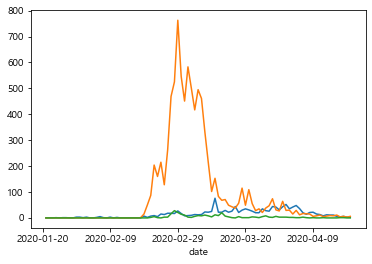

In [88]:
confirmed_경기.sum(axis=1).diff().plot()
confirmed_영남.sum(axis=1).diff().plot()
confirmed_호서.sum(axis=1).diff().plot()

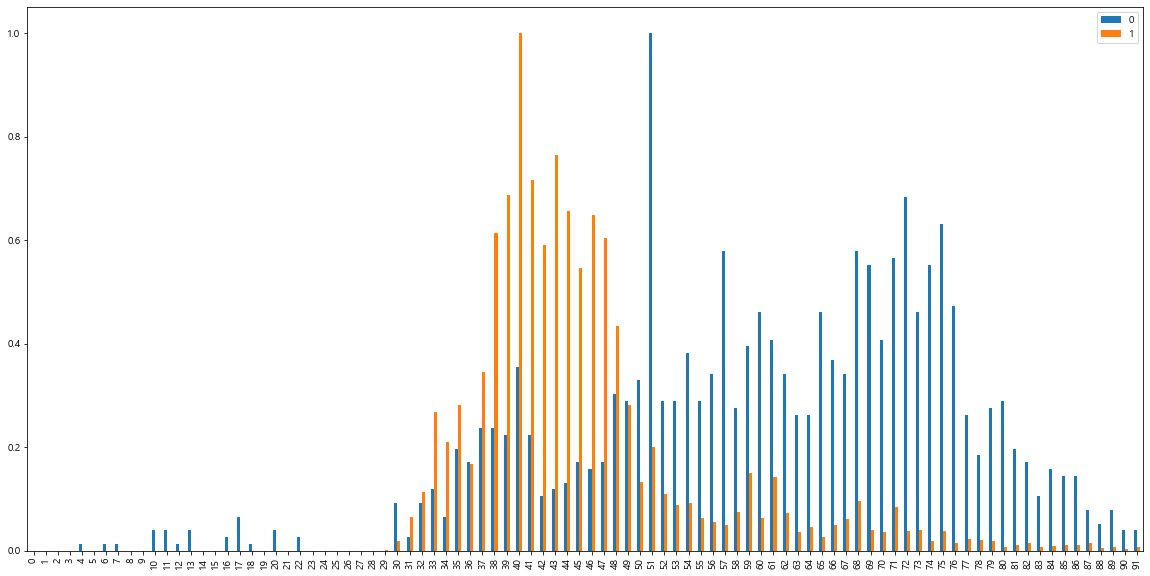

In [89]:
x = pd.concat([confirmed_경기.sum(axis=1).diff().fillna(0),confirmed_영남.sum(axis=1).diff().fillna(0)], axis=1)
# data = pd.concat([x,confirmed_호서.sum(axis=1).diff().fillna(0)], axis=1)

from sklearn.preprocessing import MinMaxScaler
stdScaler = MinMaxScaler()
scaled = stdScaler.fit_transform(x)
pd.DataFrame(scaled).plot(kind='bar', figsize=(20,10))

data = pd.DataFrame(scaled)

In [90]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data[0].index, y=data[0], marker_color='#835AF1'))
fig.add_trace(go.Bar(x=data[1].index, y=data[1]))
# fig.add_trace(go.Scatter(x=data[0].index, y=data[0],
#                         line=dict(color='royalblue', width=4,), showlegend=False,
#                         marker_color='#835AF1'))
# fig.add_trace(go.Scatter(x=data[0].index, y=data[1],
#                          line=dict(color='royalblue', width=4,),showlegend=False))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [91]:
df = px.data.tips()
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [92]:
patientinfo['age']

0       50s
1       30s
2       50s
3       20s
4       20s
       ... 
3321    20s
3322    20s
3323    30s
3324    20s
3325    10s
Name: age, Length: 3326, dtype: object

In [93]:
# patientinfo['color'] = 
patientinfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [94]:
fig = px.parallel_categories(patientinfo, dimensions=['age','sex', 'province','infection_case', 'state'],
                             color_continuous_scale=px.colors.sequential.Inferno,
#                labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'} 
                            )
fig.show()

In [95]:
test = patientinfo.copy()

In [96]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()
test['province'] = labelEncode.fit_transform(test['province'])
test

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,15,Gangseo-gu,NaN,overseas,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,15,Jungnang-gu,NaN,overseas,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,15,Jongno-gu,NaN,contact,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,15,Mapo-gu,NaN,overseas,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,15,Seongbuk-gu,NaN,contact,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,11,Jeju-do,NaN,overseas,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,11,Jeju-do,NaN,overseas,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,11,Jeju-do,NaN,contact,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,11,Jeju-do,NaN,overseas,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [325]:
patientinfo[['sex','age','province','infection_case',]]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3323,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [323]:

color = test.province;
# colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen'],[3,'seagreen']];
province_dim = go.parcats.Dimension(values=patientinfo.province,)
age_dim = go.parcats.Dimension(values=patientinfo.age,)
infection_case_dim = go.parcats.Dimension(values=patientinfo.infection_case)
state_dim = go.parcats.Dimension(values=patientinfo.state)


fig = go.Figure(data = [go.Parcats(dimensions=[province_dim, age_dim, infection_case_dim,state_dim],
        line={'color': color, 
#               'colorscale': colorscale
             },
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 20, 'family': 'Times'},
        tickfont={'size': 20, 'family': 'Times'},
        arrangement='freeform')]
               )

fig.show()

In [434]:
p_info = pd.read_csv('PatientInfo.csv')
p_info = p_info.fillna('None')

church=['Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel']
nurshing=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Suyeong-gu Kindergarten','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
gym=['gym facility in Sejong','gym facility in Cheonan']
etc=['Changnyeong Coin Karaoke','Seongdong-gu APT']
work = ['Guro-gu Call Center','Ministry of Oceans and Fisheries']

p_info.infection_case = p_info.infection_case.replace(church,'church')
p_info.infection_case = p_info.infection_case.replace(nurshing,'nurshing')
p_info.infection_case = p_info.infection_case.replace(gym,'gym')
p_info.infection_case = p_info.infection_case.replace(work,'work')
p_info.infection_case = p_info.infection_case.replace(etc,'etc')

p_info = p_info[(p_info.infection_case!='Shincheonji Church')&(p_info.infection_case!='None')&(p_info.infection_case!='etc')]

In [435]:
p_info['age'].unique()
p_info['age'].value_counts()

20s     424
50s     314
40s     281
30s     277
60s     216
10s      98
70s      78
80s      62
None     55
0s       44
90s      18
100s      1
Name: age, dtype: int64

In [436]:
dic = {"0s":0, "10s":10, "20s":20, "30s":30, "40s":40, "50s":50, "60s":60, "70s":70,"80s":80,"90s":90,"100s":90, 'None':20}
p_info.age.replace("20s",20)
p_info['age'].replace(dic)
p_info['age'] = p_info['age'].replace(dic)

In [437]:
p_info['age'].unique()

array([50, 30, 20, 60, 80, 70, 40, 10, 90,  0], dtype=int64)

In [438]:
p_info['state'].unique()
dic = {'released': 0, 'isolated' : 1, 'deceased' : 3}
p_info['state'] = p_info['state'].replace(dic)

In [439]:
p_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964,50,Korea,Seoul,Gangseo-gu,None,overseas inflow,1,None,75,2020-01-22,2020-01-23,2020-02-05,None,0
1,1000000002,5,male,1987,30,Korea,Seoul,Jungnang-gu,None,overseas inflow,1,None,31,None,2020-01-30,2020-03-02,None,0
2,1000000003,6,male,1964,50,Korea,Seoul,Jongno-gu,None,contact with patient,2,2.002e+09,17,None,2020-01-30,2020-02-19,None,0
3,1000000004,7,male,1991,20,Korea,Seoul,Mapo-gu,None,overseas inflow,1,None,9,2020-01-26,2020-01-30,2020-02-15,None,0
4,1000000005,9,female,1992,20,Korea,Seoul,Seongbuk-gu,None,contact with patient,2,1e+09,2,None,2020-01-31,2020-02-24,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651,female,None,20,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,None,14,None,2020-03-29,None,None,1
3322,7000000010,None,female,None,20,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,None,18,None,2020-04-03,None,None,1
3323,7000000011,None,male,None,30,Korea,Jeju-do,Jeju-do,None,contact with patient,None,7e+09,5,None,2020-04-03,None,None,1
3324,7000000012,None,female,None,20,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,None,9,None,2020-04-03,None,None,1


In [472]:
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen'], [2, 'mediumseagreen']]

fig = px.parallel_categories(p_info, dimensions=['age','sex', 'province','state'],
                             color="age", color_continuous_scale=px.colors.sequential.Inferno,
#                labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'} 
                            )
fig.show()

In [ ]:
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen'], [2, 'mediumseagreen']]

fig = px.parallel_categories(p_info, dimensions=['age','sex', 'province','infection_case','state'],
                             color="age", color_continuous_scale=px.colors.sequential.Inferno,
#                labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'} 
                            )
fig.show()

In [456]:
dic.keys()

dict_keys(['released', 'isolated', 'deceased'])

In [474]:
class_dim = go.parcats.Dimension(
    values=p_info.state,
    categoryorder='category ascending', label="state"
)

gender_dim = go.parcats.Dimension(values=p_info.age, label="age")
prov_dim = go.parcats.Dimension(values=p_info.province, label="age")


survival_dim = go.parcats.Dimension(
    values=p_info.state, label="Outcome", categoryarray=[0, 1],
    ticktext=list(dic.keys())
)

# Create parcats trace
color = p_info.state;
colorscale = [[0, 'lightsteelblue'], [0.2, 'mediumseagreen'], [1, 'lightsteelblue']];

fig = go.Figure(data = [go.Parcats(dimensions=[class_dim, gender_dim, survival_dim,prov_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

In [453]:
import plotly.graph_objects as go
from ipywidgets import widgets
import pandas as pd
import numpy as np

# Build parcats dimensions
categorical_dimensions = ['age', 'infection_case', 'province'];

dimensions = [dict(values=p_info[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(p_info), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=p_info.age, y=p_info.birth_year,
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

fig.update_layout(
        height=1000, xaxis={'title': 'sex'},
        yaxis={'title': 'infection_case', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(p_info), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color

# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

In [442]:
import plotly.graph_objects as go
from ipywidgets import widgets
import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type'];

dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=cars_df.horsepower, y=cars_df['highway-mpg'],
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

fig.update_layout(
        height=800, xaxis={'title': 'Horsepower'},
        yaxis={'title': 'MPG', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(cars_df), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color

# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

In [103]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [138]:
test = patientinfo.loc[:,['sex','age','province','infection_case','state']]
test = test.astype(str)

In [139]:
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder()

for col in test.columns[:-1]:
    test.loc[:,col] = labelEncode.fit_transform(test.loc[:,col])

In [142]:
testMatrix = test.iloc[:,:-1]
label = test.iloc[:,-1]

In [180]:
tsneResult = TSNE(n_components=3,learning_rate=300, init='pca',
                 n_iter=2000).fit_transform(testMatrix)

In [181]:
dfTsneResult = pd.DataFrame(tsneResult, columns=['V1','V2','V3']).assign(state = label)

In [182]:
dfTsneResult

,V1,V2,V3,state
0,2.333203,-32.589005,-8.890862,released
1,4.665916,-42.563179,-1.973825,released
2,19.635006,-8.827456,-4.660522,released
3,0.551490,-29.523958,21.249252,released
4,23.354557,-4.339812,13.462878,released
...,...,...,...,...
3321,-3.424919,-25.937235,6.463898,isolated
3322,-3.424919,-25.937235,6.463898,isolated
3323,10.716514,-2.448602,2.983598,isolated
3324,-3.424919,-25.937235,6.463898,isolated


In [183]:
import altair as alt
dfTsneResult.pipe(alt.Chart, width=800, height=400).mark_point().encode(x='V1:Q', y='V2:Q', color='state:N')


alt.Chart(...)

In [184]:
from plotly.offline import plot
import plotly.graph_objs as go

In [318]:
data = go.Scatter3d(
    x=dfTsneResult.iloc[:,0],    y=dfTsneResult.iloc[:,1],    z=dfTsneResult.iloc[:,2],
    text = ['point #{}'.format(i) for i in range(dfTsneResult.shape[0])],
#     text = dfTsneResult['state'],
    mode='markers',
    marker=dict(size=2,color=color,colorscale='Jet',
            line=dict( width=0.0),
            opacity=0.8 ),
)



layout = go.Layout(
    title ='<b>환자 정보 군집화<b>',
    titlefont=dict(size=36, color='#60606e',
                   family='Franklin Gothic'
                  ),
    grid=None,
    scene = dict(xaxis=dict(title='PC1'),
                 yaxis=dict(title='PC2'),
                 zaxis=dict(title='PC3')),
    autosize=False, 
    scene_camera = dict(
    up=dict(x=0, y=0, z=-1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=.7, y=.7, z=.1))

        #     margin=go.Margin(l=0, r=0, b=10, t=50, pad=0),
)
fig = go.Figure(data=[data], layout=layout)

fig.show()

In [483]:
zData = numProvince[['Overseas','Collective','Patient_contact']]
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
numProvince

,City,Sum,Overseas,Shincheonji,Collective,Patient_contact,Oversea_inflow_related,ETC,Collective cases
City,,,,,,,,,
Seoul,Seoul,633,252,8,262,18,69,24,"구로구 콜센터 관련(98명), 동대문구 동안교회-PC방 관련(20명), 만민중앙교회..."
Busan,Busan,137,24,12,53,18,1,29,"온천교회 관련(39명), 수영구 유치원 관련(5명) 등"
Daegu,Daegu,6849,20,4510,663,928,4,724,"제이미주병원 관련(196명), 한사랑요양병원 관련(128명), 대실요양병원 관련(1..."
Incheon,Incheon,93,41,2,34,5,7,4,구로구 콜센터 관련(20명) 등
Gwangju,Gwangju,30,14,9,0,1,6,0,NaN
Daejeon,Daejeon,40,10,2,11,8,0,9,산림기술연구원 관련(3명) 등
Ulsan,Ulsan,43,12,16,1,4,3,7,NaN
Sejong,Sejong,46,3,1,38,3,0,1,"해양수산부 관련(30명), 운동시설 관련(8명)"
Gyungki,Gyungki,674,162,29,322,57,62,42,"성남 은혜의강 교회 관련(72명), 구로구 콜센터-부천 생명수교회 관련(48명), ..."


In [484]:

fig = go.Figure(data=[go.Surface(z=zData.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [485]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [489]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [497]:
p_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2,male,1964,50,Korea,Seoul,Gangseo-gu,None,overseas inflow,1,None,75,2020-01-22,2020-01-23,2020-02-05,None,0
1,1000000002,5,male,1987,30,Korea,Seoul,Jungnang-gu,None,overseas inflow,1,None,31,None,2020-01-30,2020-03-02,None,0
2,1000000003,6,male,1964,50,Korea,Seoul,Jongno-gu,None,contact with patient,2,2.002e+09,17,None,2020-01-30,2020-02-19,None,0
3,1000000004,7,male,1991,20,Korea,Seoul,Mapo-gu,None,overseas inflow,1,None,9,2020-01-26,2020-01-30,2020-02-15,None,0
4,1000000005,9,female,1992,20,Korea,Seoul,Seongbuk-gu,None,contact with patient,2,1e+09,2,None,2020-01-31,2020-02-24,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,9651,female,None,20,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,None,14,None,2020-03-29,None,None,1
3322,7000000010,None,female,None,20,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,None,18,None,2020-04-03,None,None,1
3323,7000000011,None,male,None,30,Korea,Jeju-do,Jeju-do,None,contact with patient,None,7e+09,5,None,2020-04-03,None,None,1
3324,7000000012,None,female,None,20,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,None,9,None,2020-04-03,None,None,1


In [517]:
p_info['contact_number'] = p_info['contact_number'].replace('None',1).astype(int)

In [518]:
fig = px.sunburst(p_info, path=['age','sex'], values='contact_number')
fig.show()

In [519]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig =px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()